In [1]:
mapbox_access_token = "pk.eyJ1IjoicmFodWxrdW50ZTciLCJhIjoiY2xzcDBhamp0MGw1ZDJybHpjMTZiaWZxNyJ9.RNIIWEvQpKEaXAyP9b6-WQ"

In [2]:
# All the libraries required
from geopy.geocoders import Nominatim
from unidecode import unidecode
from dash import State
from dash import ctx, no_update
import geopandas as gpd
import json
import plotly.express as px
import pandas as pd
import numpy as np
from dash import Dash, dcc, html, Input, Output, callback 
import plotly.graph_objects as go
import dash_bootstrap_components as dbc
from itertools import chain
from datetime import datetime
from shapely.geometry import Polygon, MultiPolygon, Point, MultiPoint
from shapely.ops import unary_union

In [3]:
import requests
import flexpolyline as fp
from datetime import datetime, timedelta
import time

In [4]:
import itertools

In [5]:
import ast

#### simple choropleth mapbox

In [41]:
aed_latlons.loc[aed_latlons['id']==7040,'postal_code'] = 6890

In [45]:
aed_latlons.loc[aed_latlons['id']==507,'postal_code'] = 6210

In [47]:
aed_latlons.loc[aed_latlons['id']==5584,'postal_code'] = 6211

In [51]:
aed_latlons.loc[aed_latlons['id']==7939,'postal_code'] = 1040
aed_latlons.loc[aed_latlons['id']==8846,'postal_code'] = 6730
aed_latlons.loc[aed_latlons['id']==9457,'postal_code'] = 2930

In [ ]:
import chardet

In [4]:
with open('df_mun.csv', 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [6]:
df_mun = pd.read_csv('df_mun.csv', encoding = 'ISO-8859-1')

In [6]:
# df_mun['CD_REFNIS'] = df_mun['CD_REFNIS'].astype(int).astype(str)
# with open(r"D:\Rahul\Stats and Data Science\Sem 4\Datathon 24\Apn_AdMu.geojson") as f:
#     gj_shp = json.load(f)

In [7]:
df_hosp = pd.read_csv(r"D:\Rahul\Stats and Data Science\Sem 4\Datathon 24\df_hosp.csv", encoding = 'ISO-8859-1')

In [ ]:
# fig = px.choropleth_mapbox(mapbox_style="carto-positron",
#                            zoom=6, center = {"lat": 50.5039, "lon": 4.4699})

In [8]:
# fig = px.choropleth_mapbox(df_mun, geojson=gj_shp, locations='CD_REFNIS', color='MS_POPULATION',
#                            featureidkey = "properties.AdMuKey", color_continuous_scale="Sunset",
#                            mapbox_style="carto-positron",
#                            zoom=6, center = {"lat": 50.5039, "lon": 4.4699},
#                            hover_name = df_mun['TX_DESCR_NL'],
#                            opacity=0.5)

In [8]:
aed_latlons  = pd.read_parquet(r"D:\Rahul\Stats and Data Science\Sem 4\Datathon 24\aed_locations_latlon.parquet.gzip")
pit_latlons = pd.read_parquet(r"D:\Rahul\Stats and Data Science\Sem 4\Datathon 24\pit_locations_latlon.parquet.gzip")
mug_latlons = pd.read_parquet(r"D:\Rahul\Stats and Data Science\Sem 4\Datathon 24\mug_locations_latlon.parquet.gzip")

In [68]:
f = lambda x: x.split(',')[1]

In [73]:
mug_latlons

,hospital_id,mug_id,campus_id,name_hospital,name_campus,address_campus,postal_code,municipality,region,province,Full_Address,Lat,Lon
0,9,102000,6230,ZIEKENHUISNETWERK ANTWERPEN (ZNA),ZNA CADIX,KEMPENSTRAAT 100,2030,ANTWERPEN,V,Antwerpen,"KEMPENSTRAAT 100,Antwerpen,Belgium",51.231380,4.415252
1,99,102000,2020,GZA- ZIEKENHUIZEN,SINT-VINCENTIUS,ST.-VINCENTIUSSTRAAT 20,2018,ANTWERPEN,V,Antwerpen,"ST.-VINCENTIUSSTRAAT 20,Antwerpen,Belgium",51.206009,4.412680
2,682,102000,1210,AZ MONICA,DEURNE,FLORENT PAUWELSLEI 1,2100,DEURNE,V,Antwerpen,"FLORENT PAUWELSLEI 1,Antwerpen,Belgium",51.206367,4.470202
3,9,103000,2000,ZIEKENHUISNETWERK ANTWERPEN (ZNA),ZNA MIDDELHEIM,LINDENDREEF 1,2020,ANTWERPEN,V,Antwerpen,"LINDENDREEF 1,Antwerpen,Belgium",51.183318,4.421585
4,99,103000,1290,GZA- ZIEKENHUIZEN,SINT- AUGUSTINUS,OOSTERVELDLAAN 24,2610,WILRIJK,V,Antwerpen,"OOSTERVELDLAAN 24,Antwerpen,Belgium",51.175223,4.416653
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,20,808000,3010,CHR VERVIERS - EAST BELGIUM,LA TOURELLE,RUE DU PARC 29,4800,VERVIERS,W,Luik,"RUE DU PARC 29,Luik,Belgium",50.631450,5.575543
90,168,901000,3720,VIVALIA,HOPITAL DE BASTOGNE,RUE DE HOUFFALIZE 1,6600,BASTOGNE,W,Luxemburg,"RUE DE HOUFFALIZE 1,Luxemburg,Belgium",50.159134,5.683114
91,246,902000,3690,VIVALIA,HOPITAL D'ARLON,RUE DES DEPORTES 137,6700,ARLON,W,Luxemburg,"RUE DES DEPORTES 137,Luxemburg,Belgium",49.678096,5.820691
92,168,903000,3240,VIVALIA,HOPITAL DE LIBRAMONT,AVENUE DE HOUFFALIZE 35,6800,LIBRAMONT,W,Luxemburg,"AVENUE DE HOUFFALIZE 35,Luxemburg,Belgium",49.925186,5.381384


In [75]:
mug_latlons.columns

Index(['hospital_id', 'mug_id', 'campus_id', 'name_hospital', 'name_campus',
       'address_campus', 'postal_code', 'municipality', 'region', 'province',
       'Full_Address', 'Lat', 'Lon'],
      dtype='object')

In [74]:
mug_latlons['Full_Address'].apply(f)

0     Antwerpen
1     Antwerpen
2     Antwerpen
3     Antwerpen
4     Antwerpen
        ...    
89         Luik
90    Luxemburg
91    Luxemburg
92    Luxemburg
93    Luxemburg
Name: Full_Address, Length: 94, dtype: object

In [72]:
mug_latlons.loc[0,'Full_Address']

'KEMPENSTRAAT 100,Antwerpen,Belgium'

In [10]:
aed_latlons

,id,type,address,number,postal_code,municipality,province,location,public,available,hours,Full_Address,Lat,Lon
0,13.0,,Blvd. Fr. Roosevelt,24.0,7060.0,SOIGNIES,Hainaut,,Y,,,"Blvd. Fr. Roosevelt,24.0,Hainaut,Belgium",50.525708,4.062102
1,70.0,,Ch. De Wégimont,76.0,4630.0,Ayeneux,Liège,,,,,"Ch. De Wégimont,76.0,Liège,Belgium",50.607680,5.730187
2,71.0,,Place Saint - Lambert,NaN,4020.0,Liège,Liège,,,,,"Place Saint - Lambert,,Liège,Belgium",50.645622,5.573620
3,72.0,,Rue du Doyard,NaN,4990.0,Lierneux,Liège,,,,,"Rue du Doyard,,Liège,Belgium",50.680270,5.631609
4,73.0,,Fond Saint Servais,NaN,4000.0,Liège,Liège,,,,,"Fond Saint Servais,,Liège,Belgium",50.646806,5.571031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15222,16662.0,Appareil fixe-Vast apparaat,Nekkerspoel-Borcht,19.0,2800.0,Mechelen,Antwerpen,reddersgebouw aan zwemvijver,Non-Nee,Non-Nee,,"Nekkerspoel-Borcht,19.0,Antwerpen,Belgium",51.026104,4.494910
15223,16664.0,Appareil fixe-Vast apparaat,Nieuwe Dreef,17.0,9160.0,Lokeren,Oost-Vlaanderen,Locatie : ingang poort hoofdgebouw,Oui-Ja,Oui-Ja,,"Nieuwe Dreef ,17.0,Oost-Vlaanderen,Belgium",51.095959,3.915134
15224,16665.0,Appareil fixe-Vast apparaat,Panterschipstraat,207.0,9000.0,Gent,Oost-Vlaanderen,,Oui-Ja,Non-Nee,,"Panterschipstraat ,207.0,Oost-Vlaanderen,Belgium",51.094909,3.721281
15225,16666.0,Appareil fixe-Vast apparaat,Albert Leemansplein,20.0,1050.0,Bruxelles,Bruxelles-Brussel,,Oui-Ja,Non-Nee,,"Albert Leemansplein,20.0,Bruxelles-Brussel,Bel...",50.822224,4.362844


In [9]:
amb_locs = pd.read_parquet('ambulance_locations.parquet.gzip')

In [10]:
amb_locs.rename({'latitude': 'Lat', 'longitude': 'Lon'},axis=1, inplace=True)

In [12]:
# bru_codes = [1070,1082, 1040, 1190, 1130, 1090, 1020, 1120, 1210, 1180, 1200, 1150, 1170, 1030, 1060, 1080, 1081, 1050, 1083, 1140, 1000, 1160]
# antw_codes = [2000,2018, 2020, 2030, 2040, 2050, 2170]
# ghent_codes = [9000, 9030, 9031, 9032, 9040, 9041, 9042, 9050, 9051, 9052]
# leuven_codes = [3000, 3001, 3010, 3012, 3018]
# oostende_codes = [8400]
# kortrijk_codes = [8500, 8501, 8510, 8511]



# aed_subset = aed_latlons[aed_latlons['postal_code'].isin(list(itertools.chain(antw_codes, kortrijk_codes)))]

6.691666666666666

In [11]:
aed_loc_subset = aed_latlons[aed_latlons.postal_code.isin([2000,2018, 2020, 2030, 2040, 2050, 3000, 3001, 3010, 3012, 3018,8500, 8501, 8510, 8511, 2170])]

In [12]:
aed_locs_antwp = aed_latlons[aed_latlons.postal_code.isin([2000,2018, 2020, 2030, 2040, 2050, 2170])]

In [74]:
aed_latlons.province.unique()

array(['Hainaut', 'Liège', 'Bruxelles-Brussel', 'Antwerpen',
       'Vlaams-Brabant', 'Luxembourg', 'Limburg', 'West-Vlaanderen',
       'Oost-Vlaanderen', 'Brabant Wallon', 'Namur', ''], dtype=object)

In [13]:
aed_latlons_antw_prov = aed_latlons[aed_latlons.province == 'Antwerpen']

In [15]:
aed_loc_subset_sub = aed_loc_subset[['postal_code','Lat', 'Lon']]

In [16]:
vec_dict = {'AED': [aed_locs_antwp,'orange'], 'MUG': [mug_latlons,'purple'], 'AMB': [amb_locs,'green'], 'PIT': [pit_latlons,'red']}

In [17]:
df_aed_leuven = pd.read_csv('aed_leuven_wt.csv')

In [18]:
mug_dt = pd.read_csv(r"D:\Rahul\Stats and Data Science\Sem 4\Datathon 24\mug_dt.csv")
amb_dt = pd.read_csv(r"D:\Rahul\Stats and Data Science\Sem 4\Datathon 24\amb_dt.csv")
pit_dt = pd.read_csv(r"D:\Rahul\Stats and Data Science\Sem 4\Datathon 24\pit_dt.csv")

In [19]:
df_hist_cd = pd.read_csv(r"D:\Rahul\Stats and Data Science\Sem 4\Datathon 24\cardiac_arrest.csv")

In [20]:
aed_subset_antkort = pd.read_csv('Ant_kort_aed_wt.csv')

In [21]:
aed_subset_antkort.drop('index', axis = 1, inplace=True)

In [23]:
aed_leuantkort = pd.concat([df_aed_leuven, aed_subset_antkort], axis = 0)

In [24]:
amb_subset = amb_dt[amb_dt.province.isin(['Antwerpen', 'Vlaams-Brabant', 'West-Vlaanderen'])]

In [26]:
amb_subset.to_csv('amb_subset.csv')

In [27]:
vec_dt_dict = {'MUG': mug_dt, 'PIT':pit_dt, 'AMB':amb_subset}

In [110]:
app = Dash(__name__)
app.title = 'Belgium - Emergency Response'

mygraph = dcc.Graph(id='belgium_map', figure={}, config={'displayModeBar': False}, style ={'height':'650px'})

# vector_dropdown = dcc.Dropdown(options=["MUG", "AMB", "PIT"], clearable=True, id = 'vec_dd',
#                                multi=True, style={'width': '50%'})

# aed_radio = dcc.RadioItems(['Yes', 'No'], 'No', id = 'aed_loc_option', labelStyle={'display': 'inline-block'})
# aed_subset_radio = dcc.RadioItems(['Yes', 'No'], 'No', id = 'aed_subset', labelStyle={'display': 'inline-block'})

# vec_dt_dropdown = dcc.Dropdown(options=["MUG", "AMB", "PIT"], clearable=True, id = 'vec_dt',
#                                multi=False, style={'width': '50%'})
# hist_cardiac_radio = dcc.RadioItems(['Yes', 'No'], 'No', id = 'hist_cardiac', labelStyle={'display': 'inline-block'})

# all_hosp_radio = dcc.RadioItems(['Yes', 'No'], 'No', id = 'all_hosps', labelStyle={'display': 'inline-block'})
# sol_acc = dcc.RadioItems(['Yes', 'No'], 'No', id = 'sol', labelStyle={'display': 'inline-block'})



# app.layout = html.Div([
#                     html.Div([
#                         html.Div([html.Label('Choose vector'),vector_dropdown]),
#                         html.Div([html.Label('Vector accessibility'),vec_dt_dropdown]),
#                         html.Div([html.Label('Visualize AED locations(Antwerp)?'), aed_radio]),
#                         html.Div([html.Label('AED accesibility?'), aed_subset_radio]),
#                         html.Div([html.Label('Historical cardiac arrest cases'), hist_cardiac_radio]),
#                         html.Div([html.Label('All hospitals?'), all_hosp_radio]),
#                         html.Div([html.Label('2 accessiblities?'), sol_acc])
#                     ]),
    
#                     html.Div([mygraph])
#                       ])



vector_dropdown = dcc.Dropdown(options=["MUG", "AMB", "PIT"], clearable=True, id='vec_dd',
                               multi=True, style={'width': '70%', 'margin-bottom': '10px'})
vec_dt_dropdown = dcc.Dropdown(options=["MUG", "AMB", "PIT"], clearable=True, id='vec_dt',
                               multi=False, style={'width': '70%', 'margin-bottom': '10px'})

aed_radio = dcc.RadioItems(options=[{'label': 'Yes', 'value': 'Yes'}, {'label': 'No', 'value': 'No'}], value='No',
                           id='aed_loc_option', labelStyle={'display': 'inline-block'}, style={'margin-bottom': '10px'})
aed_subset_radio = dcc.RadioItems(options=[{'label': 'Yes', 'value': 'Yes'}, {'label': 'No', 'value': 'No'}], value='No',
                                 id='aed_subset', labelStyle={'display': 'inline-block'}, style={'margin-bottom': '10px'})
hist_cardiac_radio = dcc.RadioItems(options=[{'label': 'Yes', 'value': 'Yes'}, {'label': 'No', 'value': 'No'}],
                                     value='No', id='hist_cardiac', labelStyle={'display': 'inline-block'},
                                     style={'margin-bottom': '10px'})
all_hosp_radio = dcc.RadioItems(options=[{'label': 'Yes', 'value': 'Yes'}, {'label': 'No', 'value': 'No'}],
                                value='No', id='all_hosps', labelStyle={'display': 'inline-block'},
                                style={'margin-bottom': '10px'})
sol_acc = dcc.RadioItems(options=[{'label': 'Yes', 'value': 'Yes'}, {'label': 'No', 'value': 'No'}], value='No',
                         id='sol', labelStyle={'display': 'inline-block'}, style={'margin-bottom': '10px'})

app.layout = html.Div([
    html.Div([
        html.Div([html.Label('1. Choose vector'), vector_dropdown]),
        html.Div([html.Label('2. Visualize AED locations(Antwerp)?'), aed_radio]),
    ], style={'width': '25%', 'display': 'inline-block'}),

    html.Div([
        html.Div([html.Label('3. Vector accessibility?'), vec_dt_dropdown]),
        html.Div([html.Label('4. AED accessibility?'), aed_subset_radio]),
    ], style={'width': '25%', 'display': 'inline-block'}),

    html.Div([
        html.Div([html.Label('5. Historical cardiac arrest cases'), hist_cardiac_radio]),
        html.Div([html.Label('6. All hospitals?'), all_hosp_radio]),
    ], style={'width': '25%', 'display': 'inline-block'}),

    html.Div([
        html.Div([html.Label('7. Check solution?'), sol_acc]),
    ], style={'width': '25%', 'display': 'inline-block'}),

    html.Div([mygraph])
])





@app.callback(
    Output('belgium_map', 'figure'),
    [
        Input('vec_dd', 'value'),
        Input('aed_loc_option', 'value'),
        Input('aed_subset', 'value'),
        Input('vec_dt', 'value'),
        Input('hist_cardiac', 'value'),
        Input('all_hosps', 'value'),
        Input('sol', 'value')
    ]
)
def update_graph(vec_val, aed_op, aed_subset, vec_dt_choice, cardiac_hist_opt, all_opt, sol_opt):
    
    fig = px.choropleth_mapbox(mapbox_style="carto-positron", #open-street-map
                           zoom=6, center = {"lat": 50.5039, "lon": 4.4699})

    # for trace in fig.data:
    #     trace_name = trace.name
    #     if trace_name and trace_name.startswith('group_'):
    #         trace.visible = False    
    
    
    if vec_val:
        for vec_type in vec_val:
            chosen_df = vec_dict[vec_type][0]
            vec_col = vec_dict[vec_type][1]
            vec_lats = chosen_df['Lat']
            vec_longs = chosen_df['Lon']
            scatter_vec = go.Scattermapbox(
                lat=vec_lats, lon=vec_longs, mode='markers',
                marker=dict(size=10, opacity=0.8), name=f'{vec_type}'
            )

            # Clear existing traces related to vectors
            
            fig.add_trace(scatter_vec)
            fig.update_traces(selector=dict(name=f'{vec_type}'), marker={'color': vec_col}, legendgroup=f'group_{vec_type}')
            # fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, uirevision = 'Dont change',
            #                  legend=dict(x=0, y=-0.05, tracegroupgap=6), showlegend=True)
       

    if(aed_op == 'Yes'):
        aed_df = vec_dict["AED"][0]
        aed_col = vec_dict["AED"][1]
        aed_lats = aed_df['Lat']
        aed_longs = aed_df['Lon']
        scatter_aed = go.Scattermapbox(
            lat=aed_lats, lon=aed_longs, mode='markers',
            marker=dict(size=10, opacity=0.8), name=f'AED'
            # text = 'AED location', hoverinfo = 'text'
        )

        # Clear existing traces related to vectors

        fig.add_trace(scatter_aed)
        fig.update_traces(selector=dict(name=f'AED'), marker={'color': aed_col}, legendgroup=f'group_AED')
        # fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, uirevision = 'Dont change',showlegend=True)
        
        
    # Polygons for AED accesibility in subset: leuven, antwerp and kortrijk.  
    if(aed_subset == 'Yes'):


        print('Inside check driving time')

        interior_coords = []
        exterior_coords = []
        # indx = test_dt_df[test_dt_df[hosp_serv] == 1.0].index.values          


        # Create a list to hold the individual polygons
        polygons = []

        for row in aed_leuantkort_updated.itertuples(index=False):
            polygon = Polygon(ast.literal_eval(row.WT_3m1p5))
            polygons.append(polygon)

        # Calculate the cascaded union of all polygons to get the aggregated polygon
        aggregated_polygon = unary_union(polygons)

        # print('\nCreated aggregate polygon')

        # Check if it's a MultiPolygon
        if isinstance(aggregated_polygon, MultiPolygon):
            num_geometries = len(list(aggregated_polygon.geoms))
            for polygon in aggregated_polygon.geoms:
                exterior_coords = list(polygon.exterior.coords)
                if exterior_coords:
                    dt_lats_exterior, dt_lons_exterior = zip(*exterior_coords)
                else:
                    dt_lats_exterior, dt_lons_exterior = [], []
                    
                aed_wt_trace = go.Scattermapbox(
                    mode="lines",
                    lon=dt_lons_exterior,
                    lat=dt_lats_exterior,
                    opacity=1,
                    name=f'Walking Time(3min, 1.5m/s) To: AED',
                    showlegend=False,
                    text = 'AED acbty. zone',
                    hoverinfo = 'text'
                )

                fig.add_trace(aed_wt_trace)

        else:

            exterior_coords = list(aggregated_polygon.exterior.coords)

            if exterior_coords:
                dt_lats_exterior, dt_lons_exterior = zip(*exterior_coords)
            else:
                dt_lats_exterior, dt_lons_exterior = [], []

            aed_wt_trace = go.Scattermapbox(
                mode="lines",
                lon=dt_lons_exterior,
                lat=dt_lats_exterior,
                opacity=1,
                name=f'Walking Time(3min, 1.5m/s) To: AED',
                show_legend = False,
                text = 'AED acbty. zone',
                hoverinfo = 'text'
                
            )

            fig.add_trace(aed_wt_trace)
            print('\nSingle Polygon, Added trace')

        fig.update_traces(selector=dict(name=f'Walking Time(3min, 1.5m/s) To: AED'), line=dict(width=3, color='#83C750'))
        
                
# Vector driving times: 
    if(vec_dt_choice):

        print('Inside vec driving time')

        interior_coords = []
        exterior_coords = []
        
        df = vec_dt_dict[vec_dt_choice]
         

        polygons = []

        for row in df.itertuples(index=False):
            polygon = Polygon(ast.literal_eval(row.DT_6))
            polygons.append(polygon)


        aggregated_polygon = unary_union(polygons)

        if isinstance(aggregated_polygon, MultiPolygon):

            num_geometries = len(list(aggregated_polygon.geoms))

            for polygon in aggregated_polygon.geoms:

                exterior_coords = list(polygon.exterior.coords)

                for interior in polygon.interiors:
                    interior_coords.extend(list(interior.coords))

                if exterior_coords:
                    dt_lats_exterior, dt_lons_exterior = zip(*exterior_coords)
                else:
                    dt_lats_exterior, dt_lons_exterior = [], []

                if interior_coords:
                    dt_lats_interior, dt_lons_interior = zip(*interior_coords)
                else:
                    dt_lats_interior, dt_lons_interior = [], []

                vec_dt_trace = go.Scattermapbox(
                    mode="lines",
                    lon=dt_lons_exterior,
                    lat=dt_lats_exterior,
                    opacity=1,
                    name=f'Driving Time(6mins): {vec_dt_choice}',
                    showlegend=False,
                    text = f'{vec_dt_choice} acbty. zone',
                    hoverinfo = 'text'# Conditionally set showlegend
                )

                interior_trace = go.Scattermapbox(
                    mode="markers",
                    fill=None,
                    lon=dt_lons_interior,
                    lat=dt_lats_interior,
                    opacity=0.7,
                    name=f'Unreachable Area Boundary To: {vec_dt_choice}',
                    text = f'{vec_dt_choice} inacb. zone',
                    hoverinfo = 'text',
                    showlegend=False # Conditionally set showlegend
                )

                # Add both traces to the figure
                fig.add_trace(vec_dt_trace)
                fig.add_trace(interior_trace)
                # print('\nMultipolygon, Added trace')
        else:

            exterior_coords = list(aggregated_polygon.exterior.coords)
            for interior in aggregated_polygon.interiors:
                interior_coords.extend(list(interior.coords))
            if exterior_coords:
                dt_lats_exterior, dt_lons_exterior = zip(*exterior_coords)
            else:
                dt_lats_exterior, dt_lons_exterior = [], []
            if interior_coords:
                dt_lats_interior, dt_lons_interior = zip(*interior_coords)
            else:
                dt_lats_interior, dt_lons_interior = [], []

            vec_dt_trace = go.Scattermapbox(
                mode="lines",
                lon=dt_lons_exterior,
                lat=dt_lats_exterior,
                opacity=1,
                hoverinfo= None ,
                name=f'Driving Time(6mins): {vec_dt_choice}'
            )

            interior_trace = go.Scattermapbox(
                mode="markers",
                fill=None,
                lon=dt_lons_interior,
                lat=dt_lats_interior,
                opacity=0.7,
                name=f'Unreachable Area Boundary To: {vec_dt_choice}'
            )
            # Add both traces to the figure
            fig.add_trace(vec_dt_trace)
            fig.add_trace(interior_trace)
            print('\nSingle Polygon, Added trace')

        fig.update_traces(selector=dict(name=f'Driving Time(6mins): {vec_dt_choice}'), line=dict(width=3, color='black'))
        fig.update_traces(selector=dict(name=f'Unreachable Area Boundary To: {vec_dt_choice}'), marker=dict(size=3, color='blue'))
        # fig.update_layout(
        #     legend=dict(x=0, y=-0.3, tracegroupgap=6), showlegend = False
        # )                      
    
    if(cardiac_hist_opt == 'Yes'):
        
        df = df_hist_cd
        ch_lats = df_hist_cd['Lat']
        ch_longs = df_hist_cd['Lon']
        scatter_ch = go.Scattermapbox(
            lat=ch_lats, lon=ch_longs, mode='markers',
            marker=dict(size=10, opacity=0.8), name=f'CH',
            text = 'Historical C.A. case',
            hoverinfo = 'text'
        )


        fig.add_trace(scatter_ch)
        fig.update_traces(selector=dict(name=f'CH'), marker={'color': 'purple'}, legendgroup=f'group_CH')
        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, uirevision = 'Dont change', showlegend = False)

    if(all_opt == 'Yes'):
        
        all_col = 'purple'
        all_lats = df_hosp['Latitude']
        all_longs = df_hosp['Longitude']
        scatter_all = go.Scattermapbox(
            lat=all_lats, lon=all_longs, mode='markers',
            marker=dict(size=10, opacity=0.8), name=f'All hosp'
        )

        fig.add_trace(scatter_all)
        fig.update_traces(selector=dict(name=f'All hosp'), marker={'color': all_col}, legendgroup=f'group_all_hosp')
        # fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, uirevision = 'Dont change',
                         # legend=dict(x=0, y=-0.05, tracegroupgap=6), showlegend=False)        
        
    if(sol_opt == 'Yes'):
        print('\nInside 2 sols')
        interior_coords = []
        exterior_coords = []
        polygons = []
        for row in sol_df.itertuples(index=False):
            polygon = Polygon(ast.literal_eval(row.WT_3m1p5))
            polygons.append(polygon)
        aggregated_polygon = unary_union(polygons)
        if isinstance(aggregated_polygon, MultiPolygon):

            num_geometries = len(list(aggregated_polygon.geoms))

            for polygon in aggregated_polygon.geoms:

                exterior_coords = list(polygon.exterior.coords)

                if exterior_coords:
                    dt_lats_exterior, dt_lons_exterior = zip(*exterior_coords)
                else:
                    dt_lats_exterior, dt_lons_exterior = [], []

                sol_wt_trace = go.Scattermapbox(
                    mode="lines",
                    lon= dt_lons_exterior,
                    lat=dt_lats_exterior,
                    opacity=1,
                    name=f'WT To: AED',
                    showlegend=False,
                    text = 'AED acbty. zone',
                    hoverinfo = 'text'
                )

            fig.add_trace(sol_wt_trace)
        else:

            exterior_coords = list(aggregated_polygon.exterior.coords)

            if exterior_coords:
                dt_lats_exterior, dt_lons_exterior = zip(*exterior_coords)
            else:
                dt_lats_exterior, dt_lons_exterior = [], []

            sol_wt_trace = go.Scattermapbox(
                mode="lines",
                lon=dt_lons_exterior,
                lat=dt_lats_exterior,
                opacity=1,
                name=f'WT To: AED',
                showlegend = False,
                text = 'AED acbty. zone',
                hoverinfo = 'text'               
            )

            fig.add_trace(sol_wt_trace)

            print('\nSingle Polygon, Added trace')
            

        fig.update_traces(selector=dict(name=f'WT To: AED'), line=dict(width=3, color='turquoise'))        
        
    # fig.data = [trace for trace in fig.data if "scattermapbox" not in trace.type]
    
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, uirevision = 'Dont change',
                         legend=dict(x=0, y=-0.05, tracegroupgap=6), showlegend=False) 
        
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, jupyter_mode='external', use_reloader=False)


Dash app running on http://127.0.0.1:8050/
Inside check driving time
Inside check driving time
Inside vec driving time
Inside check driving time
Inside vec driving time
Inside check driving time
Inside vec driving time

Inside 2 sols

Single Polygon, Added trace


In [78]:
# # Aggregate driving times
    
#     if(aggr_opt == 'Yes'):

#         print('Inside aggr driving time')

#         interior_coords = []
#         exterior_coords = []
#         df = aggr_antwp_bru
#         polygons = []
#         for row in df.itertuples(index=False):
#             polygon = Polygon(ast.literal_eval(row.DT_6))
#             polygons.append(polygon)

#         aggregated_polygon = unary_union(polygons)

#         # Check if it's a MultiPolygon
#         if isinstance(aggregated_polygon, MultiPolygon):
#             # Check the number of geometries within the MultiPolygon
#             num_geometries = len(list(aggregated_polygon.geoms))

#             for polygon in aggregated_polygon.geoms:
#                 # Extract exterior coordinates
#                 exterior_coords = list(polygon.exterior.coords)
#                 # Extract interior rings (holes) if present
#                 for interior in polygon.interiors:
#                     interior_coords.extend(list(interior.coords))

#                 if exterior_coords:
#                     dt_lats_exterior, dt_lons_exterior = zip(*exterior_coords)
#                 else:
#                     dt_lats_exterior, dt_lons_exterior = [], []

#                 if interior_coords:
#                     dt_lats_interior, dt_lons_interior = zip(*interior_coords)
#                 else:
#                     dt_lats_interior, dt_lons_interior = [], []

#                 # Set showlegend based on the number of geometries
#                 # show_legend = False if num_geometries > 2 else True

#                 vec_dt_trace = go.Scattermapbox(
#                     mode="lines",
#                     lon=dt_lons_exterior,
#                     lat=dt_lats_exterior,
#                     opacity=1,
#                     name=f'Driving Time(6mins) aggr',
#                     showlegend=True
#                 )

#                 interior_trace = go.Scattermapbox(
#                     mode="markers",
#                     fill=None,
#                     lon=dt_lons_interior,
#                     lat=dt_lats_interior,
#                     opacity=0.7,
#                     name=f'Unreachable Area Boundary To aggr',
#                     showlegend=show_legend  # Conditionally set showlegend
#                 )

#                 # Add both traces to the figure
#                 fig.add_trace(vec_dt_trace)
#                 fig.add_trace(interior_trace)
#                 # print('\nMultipolygon, Added trace')
#         else:
#             # It's a single Polygon, so handle it as before
#             exterior_coords = list(aggregated_polygon.exterior.coords)
#             # Extract interior rings (holes) if present
#             for interior in aggregated_polygon.interiors:
#                 interior_coords.extend(list(interior.coords))

#             if exterior_coords:
#                 dt_lats_exterior, dt_lons_exterior = zip(*exterior_coords)
#             else:
#                 dt_lats_exterior, dt_lons_exterior = [], []

#             if interior_coords:
#                 dt_lats_interior, dt_lons_interior = zip(*interior_coords)
#             else:
#                 dt_lats_interior, dt_lons_interior = [], []

#             aed_wt_trace = go.Scattermapbox(
#                 mode="lines",
#                 lon=dt_lons_exterior,
#                 lat=dt_lats_exterior,
#                 opacity=1,
#                 name=f'Driving Time(6mins) aggr'
#             )

#             interior_trace = go.Scattermapbox(
#                 mode="markers",
#                 fill=None,
#                 lon=dt_lons_interior,
#                 lat=dt_lats_interior,
#                 opacity=0.7,
#                 name=f'Unreachable Area Boundary To aggr'
#             )

#             # Add both traces to the figure
#             fig.add_trace(vec_dt_trace)
#             fig.add_trace(interior_trace)
#             print('\nSingle Polygon, Added trace')

#     fig.update_traces(selector=dict(name=f'Driving Time(6mins) aggr'), line=dict(width=3, color='#83C750'))
#     fig.update_traces(selector=dict(name=f'Unreachable Area Boundary To aggr'), marker=dict(size=3, color='blue'))
#     fig.update_layout(
#         legend=dict(x=0, y=-0.3, tracegroupgap=6), showlegend = False
#     )  

Inside check driving time
Inside vec driving time
Inside check driving time
Inside vec driving time

Single Polygon, Added trace


In [209]:
list(aed_leuantkort.loc[2].WT_3m1p5)[0]

'[(50.873909, 4.68775), (50.873866, 4.687858), (50.87378, 4.687943), (50.873737, 4.688072), (50.873737, 4.688244), (50.873694, 4.688373), (50.873609, 4.688458), (50.873609, 4.688544), (50.873694, 4.68863), (50.873694, 4.688716), (50.873437, 4.688802), (50.873394, 4.688931), (50.873437, 4.689102), (50.873523, 4.689188), (50.873609, 4.689145), (50.873694, 4.689145), (50.873737, 4.689274), (50.873737, 4.68996), (50.873694, 4.690089), (50.873609, 4.690175), (50.873566, 4.690304), (50.873566, 4.690819), (50.873609, 4.690948), (50.873737, 4.69099), (50.873909, 4.69099), (50.874038, 4.690948), (50.874124, 4.69069), (50.874209, 4.69069), (50.874252, 4.690819), (50.874252, 4.69099), (50.874295, 4.691119), (50.874424, 4.691162), (50.874553, 4.691119), (50.874639, 4.691033), (50.874767, 4.69099), (50.874896, 4.691033), (50.874939, 4.691162), (50.874896, 4.691291), (50.874639, 4.691377), (50.874381, 4.691634), (50.874252, 4.691677), (50.874081, 4.691677), (50.873952, 4.691634), (50.873866, 4.69154

In [217]:
missing_aed_acbty.WT_3m1p5 = missing_aed_acbty.WT_3m1p5.astype(str)

C:\Users\rahul\AppData\Local\Temp/ipykernel_14924/3632473481.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [218]:
missing_aed_acbty

,index,id,type,address,number,postal_code,municipality,province,location,public,available,hours,Full_Address,Lat,Lon,WT_3m1p5
0,103,385.0,,Kolonel Begaultlaan,15.0,3012.0,Wilsele,Vlaams-Brabant,,,,,"Kolonel Begaultlaan ,15.0,Vlaams-Brabant,Belgium",50.895865,4.706252,"[(50.896225, 4.704745), (50.896225, 4.705067),..."
1,119,419.0,,Katjeswilgenlaan,NaN,3010.0,Kessel-Lo,Vlaams-Brabant,,N,,,"Katjeswilgenlaan ,,Vlaams-Brabant,Belgium",50.893646,4.718684,"[(50.895152, 4.717062), (50.895066, 4.717126),..."
2,408,994.0,,Provincieplein,1.0,3010.0,Leuven,Vlaams-Brabant,,Y,,,"Provincieplein,1.0,Vlaams-Brabant,Belgium",50.877192,4.716265,"[(50.877728, 4.715688), (50.877857, 4.71571), ..."
3,605,1230.0,,Kolonel Begaultlaan,NaN,3012.0,Leuven,Vlaams-Brabant,,Y,,,"Kolonel Begaultlaan ,,Vlaams-Brabant,Belgium",50.895865,4.706252,"[(50.896225, 4.704745), (50.896225, 4.705067),..."
4,1130,1904.0,,Stadionlaan,4.0,3010.0,Kessel-Lo,Vlaams-Brabant,zwembad 1e verd. EHBO lokaal,,,,"Stadionlaan,4.0,Vlaams-Brabant,Belgium",50.882354,4.735341,"[(50.881634, 4.733927), (50.881634, 4.734249),..."
5,1131,1905.0,,Aarschotsesteenweg,730.0,3012.0,Wilsele,Vlaams-Brabant,,,,,"Aarschotsesteenweg,730.0,Vlaams-Brabant,Belgium",50.928563,4.723628,"[(50.930042, 4.722941), (50.929999, 4.723048),..."
6,1437,2265.0,,Diestsesteenweg,3.0,3010.0,Kessel-Lo,Vlaams-Brabant,,,,,"Diestsesteenweg,3.0,Vlaams-Brabant,Belgium",50.888415,4.754121,"[(50.887985, 4.751265), (50.888028, 4.751372),..."
7,1879,2741.0,,Aarschotsesteenweg,58.0,3012.0,Leuven,Vlaams-Brabant,"glvl, klantenkantoor",,,,"Aarschotsesteenweg,58.0,Vlaams-Brabant,Belgium",50.928563,4.723628,"[(50.930042, 4.722941), (50.929999, 4.723048),..."
8,2193,3076.0,,Aarschotsesteenweg,163.0,3012.0,Leuven,Vlaams-Brabant,"1°verd,gang kleedkamers",,,,"Aarschotsesteenweg ,163.0,Vlaams-Brabant,Belgium",50.928563,4.723628,"[(50.930042, 4.722941), (50.929999, 4.723048),..."
9,2194,3077.0,,Brandweg,8.0,3012.0,Leuven,Vlaams-Brabant,glvl - inkomhal,,,,"Brandweg ,8.0,Vlaams-Brabant,Belgium",50.902358,4.702994,"[(50.903091, 4.699938), (50.903091, 4.700432),..."


In [226]:
aed_leuantkort_updated = pd.concat([aed_leuantkort,missing_aed_acbty], axis = 0)

In [ ]:
aed_leuantkort_updated = pd.concat

In [112]:
aed_loc_subset[aed_loc_subset.Lat == 51.2475348]

,id,type,address,number,postal_code,municipality,province,location,public,available,hours,Full_Address,Lat,Lon


In [113]:
aed_latlons[aed_latlons.Lat == 51.2475348]

,id,type,address,number,postal_code,municipality,province,location,public,available,hours,Full_Address,Lat,Lon
4177,5229.0,,Terlindehofstraat,150.0,2170.0,Merksem,Antwerpen,EHBO lokaal,,,,"Terlindehofstraat ,150.0,Antwerpen,Belgium",51.247535,4.443842
13070,15187.0,Appareil fixe-Vast apparaat,Terlindenhofstraat,150.0,2170.0,ANTWERPEN,Antwerpen,/,Oui-Ja,Oui-Ja,,"Terlindenhofstraat,150.0,Antwerpen,Belgium",51.247535,4.443842


In [109]:
aed_leuantkort[aed_leuantkort.Lat == 51.2475348]

,Unnamed: 0,id,type,address,number,postal_code,municipality,province,location,public,available,hours,Full_Address,Lat,Lon,WT_3m1p5


In [111]:
aed_loc_subset

,id,type,address,number,postal_code,municipality,province,location,public,available,hours,Full_Address,Lat,Lon
54,277.0,Appareil Mobile- Mobiel apparaat,Adriaan Brouwerstraat,24.0,2000.0,Antwerpen,Antwerpen,,,,,"Adriaan Brouwerstraat,24.0,Antwerpen,Belgium",51.227592,4.403460
63,318.0,,Interleuvenlaan,58.0,3001.0,Leuven,Vlaams-Brabant,,,,,"Interleuvenlaan ,58.0,Vlaams-Brabant,Belgium",50.850719,4.730367
67,323.0,,Interleuven,58.0,3001.0,Leuven,Vlaams-Brabant,,,,,"Interleuven,58.0,Vlaams-Brabant,Belgium",50.882662,4.696771
103,385.0,,Kolonel Begaultlaan,15.0,3012.0,Wilsele,Vlaams-Brabant,,,,,"Kolonel Begaultlaan ,15.0,Vlaams-Brabant,Belgium",50.895865,4.706252
119,419.0,,Katjeswilgenlaan,NaN,3010.0,Kessel-Lo,Vlaams-Brabant,,N,,,"Katjeswilgenlaan ,,Vlaams-Brabant,Belgium",50.893646,4.718684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,16444.0,Appareil fixe-Vast apparaat,Antwerpsebaan,44.0,2040.0,Antwerpen,Antwerpen,Onthaal,Oui-Ja,Non-Nee,9-17h,"Antwerpsebaan,44.0,Antwerpen,Belgium",51.342080,4.321677
15137,16576.0,Appareil fixe-Vast apparaat,"Generaal Lemanstraat 67, 2018 Antwerpen",67.0,2018.0,Antwerpen,Antwerpen,te PwC Antwerpen op de 1ste verdieping aan de ...,Oui-Ja,Non-Nee,08:30 - 16:30,"Generaal Lemanstraat 67, 2018 Antwerpen,67.0,A...",51.193996,4.411583
15155,10448.0,Appareil fixe-Vast apparaat,Interleuvenlaan,NaN,3001.0,Heverlee,Vlaams-Brabant,"2de verdiep, bureau secretaresse",Non-Nee,Non-Nee,9-17h,"Interleuvenlaan ,,Vlaams-Brabant,Belgium",50.850719,4.730367
15170,16610.0,Appareil fixe-Vast apparaat,Kuurnsesteenweg,107.0,8500.0,Kortrijk,West-Vlaanderen,gelijkvloers aan de receptie,Oui-Ja,Non-Nee,tijdens de kantooruren,"Kuurnsesteenweg,107.0,West-Vlaanderen,Belgium",50.841647,3.268707


In [241]:
polygons = []

In [242]:


for row in sol_df.itertuples(index=False):
    polygon = Polygon(ast.literal_eval(row.WT_3m1p5))
    polygons.append(polygon)

In [243]:
polygons

[<POLYGON ((51.248 4.437, 51.248 4.437, 51.247 4.438, 51.247 4.438, 51.247 4....>,
 <POLYGON ((51.246 4.436, 51.246 4.436, 51.246 4.437, 51.246 4.437, 51.246 4....>,
 <POLYGON ((51.246 4.435, 51.246 4.436, 51.246 4.436, 51.246 4.436, 51.246 4....>]

In [36]:
aed_leuantkort.postal_code.unique()

array([3001., 3000., 2000., 2018., 8500., 2020., 2040., 2030., 8501.,
       2050., 8510., 8511.])

In [37]:
aed_latlons.postal_code.isna().sum()

34

Inside check driving time
Inside check driving time


In [40]:
aed_leuantkort.WT_3m1p5

0      [(50.851078, 4.727919), (50.851078, 4.728756),...
1      [(50.883179, 4.69393), (50.883179, 4.69408), (...
2      [(50.873909, 4.68775), (50.873866, 4.687858), ...
3      [(50.874252, 4.700625), (50.874252, 4.700947),...
4      [(50.867772, 4.71174), (50.867901, 4.711761), ...
                             ...                        
563    [(51.316838, 4.331682), (51.316924, 4.331746),...
564    [(51.342201, 4.319022), (51.342201, 4.320545),...
565    [(51.195774, 4.410346), (51.195774, 4.410667),...
566    [(50.842838, 3.266394), (50.842838, 3.270149),...
567    [(51.174531, 4.364469), (51.174617, 4.364533),...
Name: WT_3m1p5, Length: 695, dtype: object

In [ ]:
2000,2018, 2020, 2030, 2040, 2050

In [ ]:
# disp_radio = dcc.RadioItems(['Yes', 'No'], 'No', id = 'display_radio', labelStyle={'display': 'inline-block'})



    
#     if(d_val == 'Yes'):
#         all_lats = df_hosp['Latitude']
#         all_longs = df_hosp['Longitude']
#         scatter_points_all = go.Scattermapbox(
#         lat=all_lats,
#         lon=all_longs,
#         mode='markers',
#         marker=dict(size=10, opacity = 0.8),
#         text = df_hosp['Ziekenhuis '] + '-' + df_hosp['Campus'],
#         hoverinfo='text',
#         name = 'Hospitals')

#         # fig.data = [trace for trace in fig.data if "scattermapbox" not in trace.type]
#         fig.add_trace(scatter_points_all)
#         fig.update_traces(selector=dict(name = 'Hospitals'),marker={'color':'red'},  legendgroup='custom_group1')
#         fig.update_layout(
#         legend=dict( x=0, y=-0.05, tracegroupgap=6)
#         )
#         # fig.update_geos(fitbounds="locations", visible=False)
#         fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, uirevision = 'Dont change')    
        
        
#     if(vec_val is not None):
#         if(len(vec_val) == 0):
#             return no_update
        
#         print(f'\nInside vec val if loop')
#         print(f'\nVec val:{vec_val}')
        
#         chosen_df = vec_dict[vec_val[0]]
#         print('\nAssigned df')
        
#         vec_lats = chosen_df['Lat']
#         vec_longs = chosen_df['Lon']
#         print('\nAssigned coords')
        
#         scatter_vec = go.Scattermapbox(lat=vec_lats, lon=vec_longs, mode='markers',
#                                               marker=dict(size=10, opacity = 0.8), name = 'Vector')       
#         fig.add_trace(scatter_vec)
#         fig.update_traces(selector=dict(name = 'Vector'),marker={'color':'blue'},  legendgroup='custom_group2')
#         # fig.update_layout(legend=dict( x=0, y=-0.05, tracegroupgap=6))


In [21]:
df_mun

NameError: name 'df_mun' is not defined

In [40]:
vec_dict['AMB']['Lat'].values

array([51.2155158, 51.1788314, 51.2328096, 51.3155156, 51.2136226,
       51.319819 , 51.3209834, 51.1140555, 51.4646726, 51.0430641,
       51.3120142, 51.1276472, 51.4095824, 51.2333921, 51.2055292,
       50.9072587, 50.8155259, 50.7305766, 50.6601956, 50.5407363,
       50.6797955, 50.6635369, 50.6372979, 50.705059 , 50.5894263,
       50.4179964, 50.412614 , 50.4698175, 50.4910226, 50.47713  ,
       51.0371352, 50.8019177, 50.8763364, 51.132399 , 50.4760028,
       50.797913 , 50.9304366, 51.0356587, 51.0926251, 51.0977887,
       50.9981308, 50.98233  , 50.7434628, 50.8696549, 50.8785355,
       50.8680038, 50.9061581, 50.8798215, 50.7786794, 51.0023637,
       49.9279133, 51.2053995, 51.1709534, 51.0960533, 51.0838438,
       51.1873563, 51.3880749, 51.383289 , 51.301117 , 51.1889959,
       51.0773485, 51.3120757, 51.0825171, 51.0668189, 51.3948812,
       50.8324872, 50.8508852, 50.818885 , 50.8674778, 50.7832343,
       50.5813404, 50.6550814, 50.6266486, 50.5995332, 50.6738

In [21]:
for row in df_aed_leuven.itertuples(index=False):
    print(row.WT_3m1p5)
    break

[(50.873051, 4.698222), (50.873051, 4.698544), (50.873008, 4.698672), (50.872922, 4.698758), (50.872879, 4.698887), (50.872879, 4.699574), (50.872922, 4.699702), (50.873051, 4.699745), (50.874252, 4.699745), (50.874381, 4.699702), (50.874553, 4.699531), (50.874596, 4.699402), (50.874596, 4.699059), (50.874639, 4.69893), (50.874724, 4.69893), (50.87481, 4.699187), (50.874896, 4.699273), (50.874896, 4.699359), (50.87481, 4.699445), (50.874767, 4.699574), (50.874767, 4.699745), (50.87481, 4.699874), (50.874982, 4.700046), (50.875068, 4.700046), (50.875111, 4.699917), (50.875111, 4.698887), (50.875154, 4.698758), (50.875282, 4.698715), (50.875454, 4.698715), (50.875583, 4.698758), (50.875626, 4.698887), (50.875583, 4.699016), (50.875497, 4.699101), (50.875454, 4.69923), (50.875454, 4.699917), (50.875497, 4.700046), (50.875583, 4.700046), (50.875669, 4.69996), (50.875754, 4.69996), (50.87584, 4.700217), (50.875969, 4.70026), (50.876312, 4.70026), (50.876441, 4.700303), (50.876484, 4.700432)

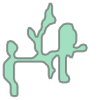

In [32]:
Polygon(ast.literal_eval(df_aed_leuven.loc[67, 'WT_3m1p5']))

In [31]:
ast.literal_eval(df_aed_leuven.loc[67, 'WT_3m1p5'])

[(50.873051, 4.698222),
 (50.873051, 4.698544),
 (50.873008, 4.698672),
 (50.872922, 4.698758),
 (50.872879, 4.698887),
 (50.872879, 4.699574),
 (50.872922, 4.699702),
 (50.873051, 4.699745),
 (50.874252, 4.699745),
 (50.874381, 4.699702),
 (50.874553, 4.699531),
 (50.874596, 4.699402),
 (50.874596, 4.699059),
 (50.874639, 4.69893),
 (50.874724, 4.69893),
 (50.87481, 4.699187),
 (50.874896, 4.699273),
 (50.874896, 4.699359),
 (50.87481, 4.699445),
 (50.874767, 4.699574),
 (50.874767, 4.699745),
 (50.87481, 4.699874),
 (50.874982, 4.700046),
 (50.875068, 4.700046),
 (50.875111, 4.699917),
 (50.875111, 4.698887),
 (50.875154, 4.698758),
 (50.875282, 4.698715),
 (50.875454, 4.698715),
 (50.875583, 4.698758),
 (50.875626, 4.698887),
 (50.875583, 4.699016),
 (50.875497, 4.699101),
 (50.875454, 4.69923),
 (50.875454, 4.699917),
 (50.875497, 4.700046),
 (50.875583, 4.700046),
 (50.875669, 4.69996),
 (50.875754, 4.69996),
 (50.87584, 4.700217),
 (50.875969, 4.70026),
 (50.876312, 4.70026),
 (5

In [52]:
t_pols = []
for row in df_aed_leuven.itertuples(index=False):
    polygon = Polygon(ast.literal_eval(row.WT_3m1p5))
    t_pols.append(polygon)

In [38]:
t_pols

[<POLYGON ((50.873 4.698, 50.873 4.699, 50.873 4.699, 50.873 4.699, 50.873 4....>,
 <POLYGON ((50.873 4.698, 50.873 4.699, 50.873 4.699, 50.873 4.699, 50.873 4....>,
 <POLYGON ((50.873 4.698, 50.873 4.699, 50.873 4.699, 50.873 4.699, 50.873 4....>,
 <POLYGON ((50.873 4.698, 50.873 4.699, 50.873 4.699, 50.873 4.699, 50.873 4....>,
 <POLYGON ((50.873 4.698, 50.873 4.699, 50.873 4.699, 50.873 4.699, 50.873 4....>,
 <POLYGON ((50.873 4.698, 50.873 4.699, 50.873 4.699, 50.873 4.699, 50.873 4....>,
 <POLYGON ((50.873 4.698, 50.873 4.699, 50.873 4.699, 50.873 4.699, 50.873 4....>,
 <POLYGON ((50.873 4.698, 50.873 4.699, 50.873 4.699, 50.873 4.699, 50.873 4....>,
 <POLYGON ((50.873 4.698, 50.873 4.699, 50.873 4.699, 50.873 4.699, 50.873 4....>,
 <POLYGON ((50.873 4.698, 50.873 4.699, 50.873 4.699, 50.873 4.699, 50.873 4....>,
 <POLYGON ((50.873 4.698, 50.873 4.699, 50.873 4.699, 50.873 4.699, 50.873 4....>,
 <POLYGON ((50.873 4.698, 50.873 4.699, 50.873 4.699, 50.873 4.699, 50.873 4....>,
 <PO

In [53]:
aggregated_polygon = unary_union(t_pols)

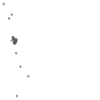

In [54]:
aggregated_polygon

In [69]:
mug_dt.columns

Index(['Unnamed: 0', 'hospital_id', 'mug_id', 'campus_id', 'name_hospital',
       'name_campus', 'address_campus', 'postal_code', 'municipality',
       'region', 'province', 'Full_Address', 'Lat', 'Lon', 'DT_6'],
      dtype='object')

In [70]:
aggr_dt = pd.concat([mug_dt[['Lat', 'Lon', 'DT_6']], amb_dt[['Lat', 'Lon', 'DT_6']], pit_dt[['Lat', 'Lon', 'DT_6']]], ignore_index=True, axis=0)

In [91]:
aggr_dt_antwp = pd.concat([mug_dt_antwp[['Lat', 'Lon', 'DT_6']], amb_dt_antwp[['Lat', 'Lon', 'DT_6']], pit_dt_antwp[['Lat', 'Lon', 'DT_6']]], ignore_index=True, axis=0)

In [105]:
aggr_dt_bru = pd.concat([mug_dt_bru[['Lat', 'Lon', 'DT_6']], amb_dt_bru[['Lat', 'Lon', 'DT_6']], pit_dt_bru[['Lat', 'Lon', 'DT_6']]], ignore_index=True, axis=0)

In [106]:
aggr_antwp_bru = pd.concat([aggr_dt_antwp, aggr_dt_bru], ignore_index=True)

In [ ]:
aggr_antwp_bru

,Lat,Lon,DT_6
0,51.231380,4.415252,"[(51.228046, 4.358053), (51.22839, 4.358311), ..."
1,51.206009,4.412680,"[(51.200409, 4.378138), (51.200409, 4.380112),..."
2,51.183318,4.421585,"[(51.174316, 4.389811), (51.174316, 4.391785),..."
3,51.215516,4.443788,"[(51.195774, 4.393759), (51.196117, 4.394016),..."
4,51.178831,4.361948,"[(51.173372, 4.33372), (51.173544, 4.333849), ..."
...,...,...,...
70,50.890728,4.308070,"[(50.876999, 4.273081), (50.877171, 4.27351), ..."
71,50.859482,4.352190,"[(50.871506, 4.30398), (50.871506, 4.307327), ..."
72,50.830582,4.389985,"[(50.831852, 4.359426), (50.832195, 4.359684),..."
73,50.833000,4.344867,"[(50.828419, 4.313421), (50.828934, 4.313507),..."


In [76]:
mug_dt_antwp = mug_dt[mug_dt['postal_code'].isin([2000,2018, 2020, 2030, 2040, 2050])]

In [81]:
amb_dt_antwp = amb_dt[amb_dt['province'].isin(['Antwerpen'])]

In [89]:
pit_dt_antwp = pit_dt[pit_dt['province'].isin(['Antwerpen/Anvers'])]

In [90]:
pit_dt_antwp

,Unnamed: 0,unit,campus,province,region,unit_id,ambucode,ambusitecode,link,Full_Address,Lat,Lon,DT_6
0,0,"100001: PIT Rumst, AZ Rivierland",Ziekenhuis/Hôpital: 104 - AZ RIVIERENLAND --- ...,Antwerpen/Anvers,Vlaanderen/Flandre,PARUMS01A,191,19101,NaN,"1270 RUMST,Antwerpen,Belgium",51.101087,4.412720,"[(51.097584, 4.365606), (51.097927, 4.365864),..."
2,2,102101: PIT Stuivenberg,Ziekenhuis/Hôpital: 009 - ZIEKENHUISNETWERK AN...,Antwerpen/Anvers,Vlaanderen/Flandre,PAANTW01A,117,11704,NaN,"1180 ZNA STUIVENBERG,Antwerpen,Belgium",51.222321,4.435068,"[(51.23148, 4.412298), (51.231823, 4.412556), ..."
3,3,"110001: PIT Lier, Heilig Hart",Ziekenhuis/Hôpital: 097 - HEILIG HART ZIEKENHU...,Antwerpen/Anvers,Vlaanderen/Flandre,PALIER01A,171,17101,NaN,"1260 HEILIG HART,Antwerpen,Belgium",51.203294,4.418431,"[(51.202641, 4.374533), (51.202984, 4.37479), ..."
4,4,113001: PIT HEILIG HART ZIEKENHUIS,Ziekenhuis/Hôpital: 102 - HEILIG HART ZIEKENHU...,Antwerpen/Anvers,Vlaanderen/Flandre,PAMOL_01A,190,19001,NaN,"2080 HEILIG HART ZIEKENHUIS MOL,Antwerpen,Belgium",51.187084,5.114250,"[(51.171741, 5.061178), (51.172085, 5.061436),..."


In [86]:
pit_dt_antwp

,Unnamed: 0,unit,campus,province,region,unit_id,ambucode,ambusitecode,link,Full_Address,Lat,Lon,DT_6


In [95]:
mug_dt_bru = mug_dt[mug_dt['postal_code'].isin([1070,1082, 1040, 1190, 1130, 1090, 1020, 1120, 1210, 1180, 1200, 1150, 1170, 1030, 1060, 1080, 1081, 1050, 1083, 1140, 1000, 1160])]

In [99]:
amb_dt_bru = amb_dt[amb_dt['region'].isin(['Brussels Hoofdstedelijk Gewest'])]

In [101]:
pit_dt_bru = pit_dt[pit_dt['region'].isin(['Brussels Hoofdstedelijk Gewest\nRégion de Bruxelles-Capitale'])]

In [100]:
pit_dt['region'].unique()

array(['Vlaanderen/Flandre',
       'Brussels Hoofdstedelijk Gewest\nRégion de Bruxelles-Capitale',
       'Wallonië/Wallonie'], dtype=object)

In [97]:
amb_dt.sample(20)

,Unnamed: 0,base,medical_resource,province,region,departure_location,departure_location_number,Lat,Lon,occasional_permanence,DT_6
206,206,FX PDS ROCH Luxembourg,ZS.LAROCHE 1 (Team: AXROCH01A),Luxemburg,Waals Gewest,Rue du Chalet 27 6980 LA-ROCHE-EN-ARDENNE,80016,50.180099,5.574772,N,"[(50.189667, 5.500116), (50.189667, 5.50209), ..."
135,135,FO HVP BEVE Waasland,PIT BEVEREN 1 (Team: POBEVE01A),Oost-Vlaanderen,Vlaams Gewest,Gravendreef 5 9120 BEVEREN,46001,51.212209,4.259622,N,"[(51.190968, 4.204931), (51.191311, 4.205189),..."
21,21,BG BLEG Croix Rouge,CR BELGIQUE BARCHON (Team: AGBLEG01A),Luik,Waals Gewest,Rue Près Champs 25A 4672 Barchon,3668,50.663537,5.688914,N,"[(50.68903, 5.615301), (50.689373, 5.615559), ..."
28,28,BH MONS [Ghlin] Croix Rouge,AMB GHLIN (Team: AHMONS07A),Henegouwen,Waals Gewest,Chemin Bouteillier 1 7011 GHLIN,3652,50.491023,3.933641,N,"[(50.490589, 3.904867), (50.490932, 3.905125),..."
93,93,FH PDS ENGH Hainaut Centre,AMB ENGHIEN (Team: AHENGH01A),Henegouwen,Waals Gewest,Rempart St Christophe 37 7850 ENGHIEN,53004,50.694655,4.032795,N,"[(50.688858, 3.930445), (50.688858, 3.932419),..."
13,13,BA WIJN AMBUCE,ZW WIJNEGEM 1 (Team: AAWIJN01A),Antwerpen,Vlaams Gewest,Bijkhoevelaan 8 2110 WIJNEGEM,3810,51.233392,4.492933,N,"[(51.230106, 4.441137), (51.230621, 4.441223),..."
182,182,FW HVP LICH Midwest,ZW LICHTERVELDE (Team: AWLICH01A),West-Vlaanderen,Vlaams Gewest,Beverenstraat 16 8810 LICHTERVELDE,31004,51.025461,3.141409,N,"[(51.028061, 3.096857), (51.028061, 3.098145),..."
62,62,FA HVP WEST Kempen,ZW WESTERLO 1 (Team: AAWEST01A),Antwerpen,Vlaams Gewest,De Merodedreef 13 2260 WESTERLO,16001,51.082517,4.912560,N,"[(51.066599, 4.854541), (51.066771, 4.85467), ..."
225,225,HB UR BRUX Europe Michel,AMB MICHEL 1 (Team: ABETTE01A)_x000D_AMB MICHE...,NaN,Brussels Hoofdstedelijk Gewest,Rue Charles Degroux 75 1040 ETTERBEEK,24114,50.842384,4.399312,N,"[(50.846786, 4.365392), (50.846872, 4.365606),..."
29,29,BH SGHI Croix Rouge,AMB SAINT-GHISLAIN (Team: AHSGHI01A),Henegouwen,Waals Gewest,Rue Louis Caty 136 7331 BAUDOUR,3651,50.477130,3.840435,N,"[(50.468616, 3.748999), (50.46896, 3.749256), ..."


In [84]:
pit_dt.columns

Index(['Unnamed: 0', 'unit', 'campus', 'province', 'region', 'unit_id',
       'ambucode', 'ambusitecode', 'link', 'Full_Address', 'Lat', 'Lon',
       'DT_6'],
      dtype='object')

In [83]:
amb_dt_antwp

,Unnamed: 0,base,medical_resource,province,region,departure_location,departure_location_number,Lat,Lon,occasional_permanence,DT_6
0,0,BA ANTW [Borgerhout] AMBUCE,ZW ANTWERPEN 7 (Team: AAANTW07A),Antwerpen,Vlaams Gewest,Gijselstraat 150 2140 BORGERHOUT,3811,51.215516,4.443788,N,"[(51.195774, 4.393759), (51.196117, 4.394016),..."
1,1,BA ANTW [Hoboken] AMBUCE,ZW ANTWERPEN 9 (Team: AAANTW09A),Antwerpen,Vlaams Gewest,Antwerpsesteenweg 242 2660 HOBOKEN,3812,51.178831,4.361948,N,"[(51.173372, 4.33372), (51.173544, 4.333849), ..."
2,2,BA ANTW [Hof Ter Schelde] AC Antwerpen,ZW ANTWERPEN 3 (Team: AAANTW03A),Antwerpen,Vlaams Gewest,August Vermeylenlaan 6 2050 ANTWERPEN,10902,51.232810,4.377237,N,"[(51.231995, 4.319043), (51.23208, 4.319258), ..."
3,3,BA ANTW [Kaai 606] SIHWA,ZW ANTWERPEN HAVEN 1 (Team: AAAPOR01A)_x000D_Z...,Antwerpen,Vlaams Gewest,Antwerpsebaan 4 (Kaai 606) 2040 ANTWERPEN,12902,51.315516,4.321506,N,"[(51.282978, 4.284582), (51.283321, 4.28484), ..."
4,4,BA ANTW [Sint Elisabeth] AC Antwerpen,ZW ANTWERPEN 2 (Team: AAANTW02A),Antwerpen,Vlaams Gewest,Leopoldstraat 26 2000 ANTWERPEN,10901,51.213623,4.405718,N,"[(51.203928, 4.372859), (51.2041, 4.372988), (..."
5,5,BA AREN Gemeente Arendonk,ZW ARENDONK 1 (Team: AAAREN01A),Antwerpen,Vlaams Gewest,Hovestraat 46 2370 ARENDONK,12101,51.319819,5.089912,N,"[(51.313019, 5.045557), (51.313019, 5.048218),..."
6,6,BA BEER AD BEERSE,ZW BEERSE 1 (Team: AABEER01A),Antwerpen,Vlaams Gewest,IJzerstraat 3 2340 BEERSE,14701,51.320983,4.856656,N,"[(51.304264, 4.806433), (51.304607, 4.80669), ..."
7,7,BA BERL Rode Kruis,ZW BERLAAR 1 (Team: AABERL01A),Antwerpen,Vlaams Gewest,Zomerstraat 26 2590 BERLAAR,3511,51.114055,4.647246,N,"[(51.129169, 4.589453), (51.129513, 4.58971), ..."
8,8,BA ESSE Gemeente Essen,ZW ESSEN 1 (Team: AAESSE01A),Antwerpen,Vlaams Gewest,Heuvelplein 23 2910 ESSEN,16403,51.464673,4.472551,N,"[(51.448975, 4.417963), (51.448975, 4.41925), ..."
9,9,BA HERS Hulshoutse AD,ZW HULSHOUT 1 (Team: AAHERS01A),Antwerpen,Vlaams Gewest,Harmoniestraat 9A 2230 RAMSEL,16803,51.043064,4.815907,N,"[(51.05278, 4.766779), (51.05278, 4.770126), (..."


In [80]:
amb_dt['province'].unique()

array(['Antwerpen', nan, 'Waals-Brabant', 'Luik', 'Henegouwen', 'Limburg',
       'Namen', 'Oost-Vlaanderen', 'Vlaams-Brabant', 'West-Vlaanderen',
       'Luxemburg'], dtype=object)

In [48]:
for row in df_aed_leuven.itertuples(index=False):
    print(f'\n{row.WT_3m1p5}')


[(50.873051, 4.698222), (50.873051, 4.698544), (50.873008, 4.698672), (50.872922, 4.698758), (50.872879, 4.698887), (50.872879, 4.699574), (50.872922, 4.699702), (50.873051, 4.699745), (50.874252, 4.699745), (50.874381, 4.699702), (50.874553, 4.699531), (50.874596, 4.699402), (50.874596, 4.699059), (50.874639, 4.69893), (50.874724, 4.69893), (50.87481, 4.699187), (50.874896, 4.699273), (50.874896, 4.699359), (50.87481, 4.699445), (50.874767, 4.699574), (50.874767, 4.699745), (50.87481, 4.699874), (50.874982, 4.700046), (50.875068, 4.700046), (50.875111, 4.699917), (50.875111, 4.698887), (50.875154, 4.698758), (50.875282, 4.698715), (50.875454, 4.698715), (50.875583, 4.698758), (50.875626, 4.698887), (50.875583, 4.699016), (50.875497, 4.699101), (50.875454, 4.69923), (50.875454, 4.699917), (50.875497, 4.700046), (50.875583, 4.700046), (50.875669, 4.69996), (50.875754, 4.69996), (50.87584, 4.700217), (50.875969, 4.70026), (50.876312, 4.70026), (50.876441, 4.700303), (50.876484, 4.700432

In [49]:
df_aed_leuven.WT_3m1p5

0      [(50.873051, 4.698222), (50.873051, 4.698544),...
1      [(50.873051, 4.698222), (50.873051, 4.698544),...
2      [(50.873051, 4.698222), (50.873051, 4.698544),...
3      [(50.873051, 4.698222), (50.873051, 4.698544),...
4      [(50.873051, 4.698222), (50.873051, 4.698544),...
                             ...                        
122    [(50.873051, 4.698222), (50.873051, 4.698544),...
123    [(50.873051, 4.698222), (50.873051, 4.698544),...
124    [(50.873051, 4.698222), (50.873051, 4.698544),...
125    [(50.873051, 4.698222), (50.873051, 4.698544),...
126    [(50.873051, 4.698222), (50.873051, 4.698544),...
Name: WT_3m1p5, Length: 127, dtype: object

#### Function to store dt/wts

In [27]:
aed_subset

,id,type,address,number,postal_code,municipality,province,location,public,available,hours,Full_Address,Lat,Lon
54,277.0,Appareil Mobile- Mobiel apparaat,Adriaan Brouwerstraat,24.0,2000.0,Antwerpen,Antwerpen,,,,,"Adriaan Brouwerstraat,24.0,Antwerpen,Belgium",51.227592,4.403460
56,310.0,,Koninginnelaan,1.0,8400.0,Oostende,West-Vlaanderen,,,,,"Koninginnelaan,1.0,West-Vlaanderen,Belgium",51.185753,2.813709
57,311.0,,Northlaan,13.0,8400.0,Oostende,West-Vlaanderen,,,,,"Northlaan,13.0,West-Vlaanderen,Belgium",51.218063,2.889260
58,312.0,,Kursaal - Oosthelling,12.0,8400.0,Oostende,West-Vlaanderen,,,,,"Kursaal - Oosthelling,12.0,West-Vlaanderen,Bel...",51.232146,2.912678
59,313.0,,Leopold Van Tyghemlaan,62.0,8400.0,Oostende,West-Vlaanderen,,,,,"Leopold Van Tyghemlaan,62.0,West-Vlaanderen,Be...",51.216237,2.887404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15170,16610.0,Appareil fixe-Vast apparaat,Kuurnsesteenweg,107.0,8500.0,Kortrijk,West-Vlaanderen,gelijkvloers aan de receptie,Oui-Ja,Non-Nee,tijdens de kantooruren,"Kuurnsesteenweg,107.0,West-Vlaanderen,Belgium",50.841647,3.268707
15173,16613.0,Appareil fixe-Vast apparaat,Zandvoordestraat,366.0,8400.0,Oostende,West-Vlaanderen,Gelijkvloers - Burelen,Oui-Ja,Oui-Ja,,"Zandvoordestraat,366.0,West-Vlaanderen,Belgium",51.210905,2.956874
15174,16614.0,Appareil fixe-Vast apparaat,Zandvoordestraat,366.0,8400.0,Oostende,West-Vlaanderen,"Gelijkvloers, Productie VISO",Oui-Ja,Oui-Ja,,"Zandvoordestraat,366.0,West-Vlaanderen,Belgium",51.210905,2.956874
15175,16615.0,Appareil fixe-Vast apparaat,Zandvoordestraat,366.0,8400.0,Oostende,West-Vlaanderen,"Gelijkvloers, Productie Mixplant",Oui-Ja,Non-Nee,Werkuren,"Zandvoordestraat,366.0,West-Vlaanderen,Belgium",51.210905,2.956874


In [133]:
here_api_key = "plIdFyhBk8CDCJd1nKstr9CnwBiVKimL3k3eJZtAVeI"

In [34]:
here_api_2 = 'gcHbxT60NzQjgFQiOYqjLPrN8yNCED38YSHRAr2gYZ0'

In [32]:
aed_subset['WT_3m1p5'] = None

C:\Users\rahul\AppData\Local\Temp/ipykernel_12556/3754769535.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
aed_subset.municipality.unique()

array(['Antwerpen', 'Kortrijk', 'KORTRIJK', 'Bissegem', 'Heule',
       'MarkeKortrijk)', 'Rollegem', 'Aalbeke', 'Bellegem', 'Zandvliet',
       'Anvers', 'ANTWERPEN', 'BISSEGEM', 'AALBEKE', 'Antwerpen ',
       'LILLO', 'anvers ', 'Anvers ', 'anvers', 'HEULE',
       'ANTWERPEN ZANDVLIET'], dtype=object)

In [32]:
def store_aed_3m1p5(df):
    print('\nStart of store coords')
    for index, row in df.iterrows():
        print('\n')
        print('-'*10)
        print(f'\n Loop iteration {index}')
        lat = df.at[index, 'Lat']
        lon = df.at[index, 'Lon']
        isochrone_url = (
                        f'https://isoline.router.hereapi.com/v8/isolines?origin={lat},{lon}&range[type]=time&range[values]={3*60}&transportMode=pedestrian&pedestrian[speed]={1.5}&apikey={here_api_2}'
                        )
        response = requests.get(isochrone_url)
        df.at[index, 'WT_3m1p5'] = fp.decode(response.json()['isolines'][0]['polygons'][0]['outer'])
        print('\nStored polygon in df')
        print('\n Sleeping for 2 sec....')
        time.sleep(5)
        print('\nAwake, starting again...')
    return 1

In [103]:
store_aed_3m1p5(aed_subset.loc[327:])


Start of store coords


----------

 Loop iteration 327

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 328

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 329

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 330

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 331

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 332

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 333

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 334

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 335

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------



1

In [159]:
aed_leuantkort['WT_3m1p5']

0      [(50.851078, 4.727919), (50.851078, 4.728756),...
1      [(50.883179, 4.69393), (50.883179, 4.69408), (...
2      [(50.873909, 4.68775), (50.873866, 4.687858), ...
3      [(50.874252, 4.700625), (50.874252, 4.700947),...
4      [(50.867772, 4.71174), (50.867901, 4.711761), ...
                             ...                        
563    [(51.316838, 4.331682), (51.316924, 4.331746),...
564    [(51.342201, 4.319022), (51.342201, 4.320545),...
565    [(51.195774, 4.410346), (51.195774, 4.410667),...
566    [(50.842838, 3.266394), (50.842838, 3.270149),...
567    [(51.174531, 4.364469), (51.174617, 4.364533),...
Name: WT_3m1p5, Length: 695, dtype: object

In [160]:
missing_aed_acbty['WT_3m1p5']

103      [(50.896225, 4.704745), (50.896225, 4.705067),...
119      [(50.895152, 4.717062), (50.895066, 4.717126),...
408      [(50.877728, 4.715688), (50.877857, 4.71571), ...
605      [(50.896225, 4.704745), (50.896225, 4.705067),...
1130     [(50.881634, 4.733927), (50.881634, 4.734249),...
1131     [(50.930042, 4.722941), (50.929999, 4.723048),...
1437     [(50.887985, 4.751265), (50.888028, 4.751372),...
1879     [(50.930042, 4.722941), (50.929999, 4.723048),...
2193     [(50.930042, 4.722941), (50.929999, 4.723048),...
2194     [(50.903091, 4.699938), (50.903091, 4.700432),...
2195     [(50.887985, 4.751265), (50.888028, 4.751372),...
2196     [(50.861077, 4.783494), (50.861163, 4.783559),...
2198     [(50.925622, 4.702642), (50.925708, 4.702706),...
2199     [(50.8988, 4.719336), (50.8988, 4.719658), (50...
2275     [(51.235986, 4.436052), (51.236072, 4.436116),...
2322     [(50.8988, 4.719336), (50.8988, 4.719658), (50...
3420     [(50.887985, 4.751265), (50.888028, 4.751372),.

In [106]:
# aed_subset.to_csv('Ant_kort_aed_wt.csv')

In [60]:
aed_subset[~aed_subset.WT_3m1p5.isna()]

,id,type,address,number,postal_code,municipality,province,location,public,available,hours,Full_Address,Lat,Lon,WT_3m1p5
54,277.0,Appareil Mobile- Mobiel apparaat,Adriaan Brouwerstraat,24.0,2000.0,Antwerpen,Antwerpen,,,,,"Adriaan Brouwerstraat,24.0,Antwerpen,Belgium",51.227592,4.403460,"[(51.226888, 4.40069), (51.227016, 4.400711), ..."
136,450.0,,Lamorinierestraat,NaN,2018.0,Antwerpen,Antwerpen,,Y,,,"Lamorinierestraat,,Antwerpen,Belgium",51.203595,4.420659,"[(51.202641, 4.4191), (51.202598, 4.419208), (..."
137,451.0,,Riderveldlaan,5.0,2018.0,Antwerpen,Antwerpen,,Y,,,"Riderveldlaan,5.0,Antwerpen,Belgium",51.190659,4.655599,"[(51.193371, 4.649813), (51.193371, 4.649963),..."
237,616.0,,Belgiëlei,34.0,2018.0,Antwerpen,Antwerpen,,,,,"Belgiëlei,34.0,Antwerpen,Belgium",51.205350,4.417591,"[(51.203885, 4.415281), (51.203971, 4.415345),..."
303,808.0,,Frankrijklei,79.0,2018.0,Antwerpen,Antwerpen,,,,,"Frankrijklei,79.0,Antwerpen,Belgium",51.215134,4.412767,"[(51.21603, 4.410517), (51.215987, 4.410625), ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,3007.0,,Noorderlaan,139.0,2030.0,Antwerpen,Antwerpen,"receptie Ferranti, 3de verd",,,,"Noorderlaan,139.0,Antwerpen,Belgium",51.264155,4.401615,"[(51.263409, 4.400218), (51.263366, 4.400325),..."
2156,3038.0,,Jozef De Bomstraat,47.0,2018.0,Antwerpen,Antwerpen,glvl,,,,"Jozef De Bomstraat,47.0,Antwerpen,Belgium",51.206390,4.405800,"[(51.207747, 4.403436), (51.207662, 4.403501),..."
2189,3072.0,,Brialmontlei,45.0,2018.0,Antwerpen,Antwerpen,"glvl, inkomhal",,,,"Brialmontlei ,45.0,Antwerpen,Belgium",51.209662,4.420580,"[(51.210365, 4.417555), (51.210408, 4.417663),..."
2190,3073.0,,Jacob Jordaensstraat,21.0,2018.0,Antwerpen,Antwerpen,"glvl, atrium",,,,"Jacob Jordaensstraat ,21.0,Antwerpen,Belgium",51.208922,4.415280,"[(51.20955, 4.412706), (51.209636, 4.41277), (..."


In [93]:
aed_subset.reset_index(inplace=True)

In [97]:
aed_subset.loc[72:]

,index,id,type,address,number,postal_code,municipality,province,location,public,available,hours,Full_Address,Lat,Lon,WT_3m1p5
72,2379,3276.0,,Ringlaan,11.0,8501.0,Heule,West-Vlaanderen,alokaal achter balie rechts,,,,"Ringlaan ,11.0,West-Vlaanderen,Belgium",51.251347,3.045404,None
73,2404,3302.0,,Emdenweg,NaN,2030.0,Antwerpen,Antwerpen,portiersloge Einde Emdenweg,,,,"Emdenweg,,Antwerpen,Belgium",51.257920,4.374390,None
74,2414,3312.0,,Izegemsestraat,375.0,8501.0,Heule,West-Vlaanderen,"atelier,glvl thv trap nr burele",,,,"Izegemsestraat,375.0,West-Vlaanderen,Belgium",50.931412,3.164877,None
75,2420,3319.0,,Scheldelaan,470.0,2040.0,Antwerpen,Antwerpen,garage nst brandweerkazerne,,,,"Scheldelaan ,470.0,Antwerpen,Belgium",51.299894,4.307434,None
76,2421,3320.0,,Scheldelaan,470.0,2040.0,Antwerpen,Antwerpen,gang naast EHBO-lokaal,,,,"Scheldelaan ,470.0,Antwerpen,Belgium",51.299894,4.307434,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,14986,16434.0,Appareil fixe-Vast apparaat,Kruisweg,6.0,2040.0,Antwerpen,Antwerpen,Portocabine - eet- & verpozingsruimte,Non-Nee,Non-Nee,08.00 - 16.30 Hrs,"Kruisweg,6.0,Antwerpen,Belgium",51.317031,4.335344,None
564,14995,16444.0,Appareil fixe-Vast apparaat,Antwerpsebaan,44.0,2040.0,Antwerpen,Antwerpen,Onthaal,Oui-Ja,Non-Nee,9-17h,"Antwerpsebaan,44.0,Antwerpen,Belgium",51.342080,4.321677,None
565,15137,16576.0,Appareil fixe-Vast apparaat,"Generaal Lemanstraat 67, 2018 Antwerpen",67.0,2018.0,Antwerpen,Antwerpen,te PwC Antwerpen op de 1ste verdieping aan de ...,Oui-Ja,Non-Nee,08:30 - 16:30,"Generaal Lemanstraat 67, 2018 Antwerpen,67.0,A...",51.193996,4.411583,None
566,15170,16610.0,Appareil fixe-Vast apparaat,Kuurnsesteenweg,107.0,8500.0,Kortrijk,West-Vlaanderen,gelijkvloers aan de receptie,Oui-Ja,Non-Nee,tijdens de kantooruren,"Kuurnsesteenweg,107.0,West-Vlaanderen,Belgium",50.841647,3.268707,None


In [81]:
demo = f'https://isoline.router.hereapi.com/v8/isolines?origin={51.251347},{3.045404}&range[type]=time&range[values]={3*60}&transportMode=pedestrian&pedestrian[speed]={1.5}&apikey={here_api_key}'

In [82]:
response = requests.get(demo)

In [83]:
response.json()

{'departure': {'time': '2024-02-19T19:30:44Z',
  'place': {'type': 'place',
   'location': {'lat': 51.2513, 'lng': 3.0453899},
   'originalLocation': {'lat': 51.2513469, 'lng': 3.0454039}}},
 'isolines': [{'range': {'type': 'time', 'value': 180},
   'polygons': [{'outer': 'BG-2l4hDwuy5FAq0B1CgIrFsF1CiIA01B1CiIpFsF1CiIA8qB1CiIrFsF1CiIA01B1CiIrFqF1CiI2CiIsFAsFrFiI1CirCAiI2C4K4KsFiQuVwViQqF2CiI1CiI_H2ChI1C_6B_6BhI1CtVAhI2CrFsFhI0ChrCAhIzCrFrFhI1ClgBA_H1CrFrFhI1C3KA_H1CrFrFhIzC3KA_H0CrFsFhI2ClgBAhI2CpFsFhI2ChI1CArFuVtViI1C-qBAiI1CqFrFiI1CiI2CsFsFiQsFsFsFiI2CuVAiI0CsFsFgI2CwVAgI2CsFsFiI2CiI1C2ChIAtV2ChIqFrF2C_HArgC2ChIsFrF2ChIA7qB2ChIsFrF2ChIAz1B2ChIqFrF2C_HAvV2C_HsFrB2CgEA4G'}]}]}

In [54]:
aed_subset.drop(324,axis=0, inplace=True)

C:\Users\rahul\AppData\Local\Temp/ipykernel_12556/3633831056.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
aed_subset.head(10)

,id,type,address,number,postal_code,municipality,province,location,public,available,hours,Full_Address,Lat,Lon,WT_3m1p5
54,277.0,Appareil Mobile- Mobiel apparaat,Adriaan Brouwerstraat,24.0,2000.0,Antwerpen,Antwerpen,,,,,"Adriaan Brouwerstraat,24.0,Antwerpen,Belgium",51.227592,4.403460,"[(51.226888, 4.40069), (51.227016, 4.400711), ..."
136,450.0,,Lamorinierestraat,NaN,2018.0,Antwerpen,Antwerpen,,Y,,,"Lamorinierestraat,,Antwerpen,Belgium",51.203595,4.420659,"[(51.202641, 4.4191), (51.202598, 4.419208), (..."
137,451.0,,Riderveldlaan,5.0,2018.0,Antwerpen,Antwerpen,,Y,,,"Riderveldlaan,5.0,Antwerpen,Belgium",51.190659,4.655599,"[(51.193371, 4.649813), (51.193371, 4.649963),..."
237,616.0,,Belgiëlei,34.0,2018.0,Antwerpen,Antwerpen,,,,,"Belgiëlei,34.0,Antwerpen,Belgium",51.205350,4.417591,"[(51.203885, 4.415281), (51.203971, 4.415345),..."
303,808.0,,Frankrijklei,79.0,2018.0,Antwerpen,Antwerpen,,,,,"Frankrijklei,79.0,Antwerpen,Belgium",51.215134,4.412767,"[(51.21603, 4.410517), (51.215987, 4.410625), ..."
324,839.0,,Generaal Lemanstraat,69.0,2018.0,Antwerpen,Antwerpen,,,,,"Generaal Lemanstraat,69.0,Antwerpen,Belgium",51.191856,4.412932,None
335,848.0,,Pr. Kennedypark,2.0,8500.0,Kortrijk,West-Vlaanderen,,,,,"Pr. Kennedypark,2.0,West-Vlaanderen,Belgium",50.800470,3.273528,None
425,1012.0,,Benzineweg,11.0,2020.0,Antwerpen,Antwerpen,,,,,"Benzineweg,11.0,Antwerpen,Belgium",51.196686,4.349528,None
430,1020.0,,Brusselstraat,59.0,2018.0,Antwerpen,Antwerpen,,,,,"Brusselstraat,59.0,Antwerpen,Belgium",51.200209,4.392079,None
528,1142.0,,Lange Gasthuisstraat,20.0,2018.0,Antwerpen,Antwerpen,,,,,"Lange Gasthuisstraat,20.0,Antwerpen,Belgium",51.214580,4.405015,None


In [30]:
aed_subset.municipality.unique()

array(['Antwerpen', 'Kortrijk', 'KORTRIJK', 'Bissegem', 'Heule',
       'MarkeKortrijk)', 'Rollegem', 'Aalbeke', 'Bellegem', 'Zandvliet',
       'Anvers', 'ANTWERPEN', 'BISSEGEM', 'AALBEKE', 'Antwerpen ',
       'LILLO', 'anvers ', 'Anvers ', 'anvers', 'HEULE',
       'ANTWERPEN ZANDVLIET'], dtype=object)

In [129]:
aed_subset.drop(aed_subset.tail(1).index, inplace=True)

C:\Users\rahul\AppData\Local\Temp/ipykernel_11792/1264293091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aed_subset.drop(aed_subset.tail(1).index, inplace=True)


In [132]:
aed_subset['WT_3m1p5'].isna().sum()

792

In [134]:
aed_subset.to_csv('Oo_Leu_Antw_Kort_first 13 WT.csv')

In [78]:
aed_subset.to_csv('Antw_Kort_first 72 WT.csv')

In [195]:
aed_leuantkort.loc[0]

,id,type,address,number,postal_code,municipality,province,location,public,available,hours,Full_Address,Lat,Lon,WT_3m1p5
0,318.0,NaN,Interleuvenlaan,58.0,3001.0,Leuven,Vlaams-Brabant,NaN,NaN,NaN,NaN,"Interleuvenlaan ,58.0,Vlaams-Brabant,Belgium",50.850719,4.730367,"[(50.851078, 4.727919), (50.851078, 4.728756),..."
0,277.0,Appareil Mobile- Mobiel apparaat,Adriaan Brouwerstraat,24.0,2000.0,Antwerpen,Antwerpen,NaN,NaN,NaN,NaN,"Adriaan Brouwerstraat,24.0,Antwerpen,Belgium",51.227592,4.403460,"[(51.226888, 4.40069), (51.227016, 4.400711), ..."


In [29]:
missing_aed_acbty = aed_loc_subset[aed_loc_subset.Lat.isin(list(set(aed_loc_subset.Lat.unique()) - set(aed_leuantkort.Lat.unique())))]

In [30]:
missing_aed_acbty.columns

Index(['id', 'type', 'address', 'number', 'postal_code', 'municipality',
       'province', 'location', 'public', 'available', 'hours', 'Full_Address',
       'Lat', 'Lon'],
      dtype='object')

In [31]:
missing_aed_acbty['WT_3m1p5'] = None

C:\Users\rahul\AppData\Local\Temp/ipykernel_1044/3441044754.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
store_aed_3m1p5(missing_aed_acbty.loc[18:])


Start of store coords


----------

 Loop iteration 18

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 19

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 20

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 21

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 22

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 23

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 24

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 25

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 26

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop ite

1

In [56]:
missing_aed_acbty.WT_3m1p5 = missing_aed_acbty['WT_3m1p5'].astype(str)

C:\Users\rahul\AppData\Local\Temp/ipykernel_1044/3303412578.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'[(50.896225, 4.704745), (50.896225, 4.705067), (50.896182, 4.705195), (50.896096, 4.705281), (50.896053, 4.70541), (50.896053, 4.705925), (50.896096, 4.706054), (50.896225, 4.706097), (50.897255, 4.706097), (50.897384, 4.70614), (50.897427, 4.706268), (50.897384, 4.706397), (50.897255, 4.70644), (50.895023, 4.70644), (50.894895, 4.706397), (50.894809, 4.706311), (50.894551, 4.706225), (50.894122, 4.705796), (50.894036, 4.705796), (50.893779, 4.706054), (50.89365, 4.706097), (50.893521, 4.706054), (50.893478, 4.705925), (50.893521, 4.705796), (50.893693, 4.705625), (50.893822, 4.705582), (50.894337, 4.705582), (50.894465, 4.705625), (50.894895, 4.706054), (50.895023, 4.706097), (50.895538, 4.706097), (50.895667, 4.706054), (50.895753, 4.705796), (50.895839, 4.70571), (50.895882, 4.705582), (50.895882, 4.705067), (50.895925, 4.704938), (50.89601, 4.704852), (50.896096, 4.704595), (50.896182, 4.704573), (50.896225, 4.704638), (50.896225, 4.704745)]'

In [153]:
missing_aed_acbty.sample(30)

,id,type,address,number,postal_code,municipality,province,location,public,available,hours,Full_Address,Lat,Lon,WT_3m1p5
11010,12745.0,Appareil fixe-Vast apparaat,Schijnpoortweg,119.0,2170.0,Merksem,Antwerpen,Antwerps Sportpaleis - inkom Lotto Arena,Non-Nee,Non-Nee,,"Schijnpoortweg,119.0,Antwerpen,Belgium",51.228470,4.441024,"[(51.227231, 4.438112), (51.227317, 4.438176),..."
13088,12979.0,Appareil fixe-Vast apparaat,Emiel Lemineurstraat,72.0,2170.0,ANTWERPEN,Antwerpen,/,Oui-Ja,Oui-Ja,,"Emiel Lemineurstraat,72.0,Antwerpen,Belgium",51.237878,4.443360,"[(51.239033, 4.441931), (51.239076, 4.442039),..."
12144,14142.0,Appareil fixe-Vast apparaat,Jan Vandeveldelaan,15.0,3010.0,Leuven,Vlaams-Brabant,in de sterilisatieruimte naast de balie,Oui-Ja,Non-Nee,tijdens openingsuren: 09-17u,"Jan Vandeveldelaan,15.0,Vlaams-Brabant,Belgium",50.874334,4.724986,"[(50.874252, 4.722426), (50.874252, 4.722576),..."
2193,3076.0,,Aarschotsesteenweg,163.0,3012.0,Leuven,Vlaams-Brabant,"1°verd,gang kleedkamers",,,,"Aarschotsesteenweg ,163.0,Vlaams-Brabant,Belgium",50.928563,4.723628,"[(50.930042, 4.722941), (50.929999, 4.723048),..."
3962,4991.0,,Albert Dejonghestraat,2.0,3010.0,Kessel-Lo,Vlaams-Brabant,clubhouse,,,,"Albert Dejonghestraat ,2.0,Vlaams-Brabant,Belgium",50.876535,4.729094,"[(50.877514, 4.726717), (50.877514, 4.726868),..."
3420,4417.0,,Diestsesteenweg,52.0,3010.0,Kessel-Lo,Vlaams-Brabant,vergaderzaal,,,,"Diestsesteenweg,52.0,Vlaams-Brabant,Belgium",50.888415,4.754121,"[(50.887985, 4.751265), (50.888028, 4.751372),..."
13090,12979.0,Appareil fixe-Vast apparaat,Oortbroek,4.0,2170.0,ANTWERPEN,Antwerpen,/,Oui-Ja,Oui-Ja,,"Oortbroek,4.0,Antwerpen,Belgium",51.250976,4.431518,"[(51.252122, 4.428842), (51.252208, 4.428906),..."
8386,9815.0,,vaartkaai,2.0,2170.0,Merksem,Antwerpen,,,,,"vaartkaai,2.0,Antwerpen,Belgium",51.236177,4.439655,"[(51.235986, 4.436052), (51.236072, 4.436116),..."
4925,6033.0,,Kolonel Begaultlaan,15.0,3012.0,Wilsele,Vlaams-Brabant,,,,,"Kolonel Begaultlaan ,15.0,Vlaams-Brabant,Belgium",50.895865,4.706252,"[(50.896225, 4.704745), (50.896225, 4.705067),..."
13823,15204.0,Appareil fixe-Vast apparaat,Bredabaan,NaN,2170.0,MERKSEM,Antwerpen,buitengevel kleedkamers,Oui-Ja,Oui-Ja,,"Bredabaan,,Antwerpen,Belgium",51.268299,4.464072,"[(51.267872, 4.462016), (51.267872, 4.462509),..."


In [59]:
aed_leuantkort_updated = pd.concat([aed_leuantkort, missing_aed_acbty], axis = 0)

In [39]:
missing_aed_acbty.reset_index(drop=True, inplace= True)

In [68]:
aed_leuantkort_updated.to_csv('aed_leuantkort_updated.csv')

In [48]:
missing_aed_acbty.drop(17, axis = 0, inplace = True)

C:\Users\rahul\AppData\Local\Temp/ipykernel_1044/894467084.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
missing_aed_acbty.loc[18:,'Full_Address':]

,Full_Address,Lat,Lon,WT_3m1p5
18,"Diestsesteenweg,52.0,Vlaams-Brabant,Belgium",50.888415,4.754121,None
19,"Borrewaterstraat ,182.0,Antwerpen,Belgium",51.239811,4.445154,None
20,"Albert Dejonghestraat ,2.0,Vlaams-Brabant,Belgium",50.876535,4.729094,None
21,"Terlindehofstraat ,150.0,Antwerpen,Belgium",51.247535,4.443842,None
22,"Rietschoorvelden,20.0,Antwerpen,Belgium",51.251904,4.431062,None
23,"Kolonel Begaultlaan ,15.0,Vlaams-Brabant,Belgium",50.895865,4.706252,None
24,"Remyln ,4.0,Vlaams-Brabant,Belgium",50.923491,4.703250,None
25,"Maantjessteenweg,50.0,Antwerpen,Belgium",51.255041,4.441430,None
26,"Bredabaan,960.0,Antwerpen,Belgium",51.268299,4.464072,None
27,"Bredabaan,190.0,Antwerpen,Belgium",51.268299,4.464072,None


In [43]:
missing_aed_acbty.drop(2, axis = 0, inplace = True)

C:\Users\rahul\AppData\Local\Temp/ipykernel_1044/371055988.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [130]:
aed_leuantkort.columns

Index(['id', 'type', 'address', 'number', 'postal_code', 'municipality',
       'province', 'location', 'public', 'available', 'hours', 'Full_Address',
       'Lat', 'Lon', 'WT_3m1p5'],
      dtype='object')

In [129]:
aed_leuantkort.drop('Unnamed: 0', axis = 1, inplace = True)

In [172]:
tpolygons = []
i = 0
for row in missing_aed_acbty.itertuples(index=False):
    print(f'\n{i+1} pass')
    polygon = Polygon(ast.literal_eval(row.WT_3m1p5))
    tpolygons.append(polygon)
    i += 1

# Calculate the cascaded union of all polygons to get the aggregated polygon
aggregated_polygon = unary_union(tpolygons)




1 pass


ValueError: malformed node or string: [(50.896225, 4.704745), (50.896225, 4.705067), (50.896182, 4.705195), (50.896096, 4.705281), (50.896053, 4.70541), (50.896053, 4.705925), (50.896096, 4.706054), (50.896225, 4.706097), (50.897255, 4.706097), (50.897384, 4.70614), (50.897427, 4.706268), (50.897384, 4.706397), (50.897255, 4.70644), (50.895023, 4.70644), (50.894895, 4.706397), (50.894809, 4.706311), (50.894551, 4.706225), (50.894122, 4.705796), (50.894036, 4.705796), (50.893779, 4.706054), (50.89365, 4.706097), (50.893521, 4.706054), (50.893478, 4.705925), (50.893521, 4.705796), (50.893693, 4.705625), (50.893822, 4.705582), (50.894337, 4.705582), (50.894465, 4.705625), (50.894895, 4.706054), (50.895023, 4.706097), (50.895538, 4.706097), (50.895667, 4.706054), (50.895753, 4.705796), (50.895839, 4.70571), (50.895882, 4.705582), (50.895882, 4.705067), (50.895925, 4.704938), (50.89601, 4.704852), (50.896096, 4.704595), (50.896182, 4.704573), (50.896225, 4.704638), (50.896225, 4.704745)]

In [170]:
aed_leuantkort_updated.reset_index(inplace = True)

In [175]:
missing_aed_acbty.reset_index(inplace = True)

In [176]:
ast.literal_eval(missing_aed_acbty.loc[1].WT_3m1p5)

ValueError: malformed node or string: [(50.895152, 4.717062), (50.895066, 4.717126), (50.89498, 4.717212), (50.894723, 4.717298), (50.894637, 4.717383), (50.89438, 4.717469), (50.894294, 4.717555), (50.894165, 4.717598), (50.893993, 4.717598), (50.893865, 4.717641), (50.893693, 4.717813), (50.89365, 4.717941), (50.89365, 4.718285), (50.893693, 4.718413), (50.893779, 4.718499), (50.893822, 4.718628), (50.893822, 4.719315), (50.893865, 4.719443), (50.894122, 4.719701), (50.894165, 4.71983), (50.894122, 4.719958), (50.894036, 4.719958), (50.893693, 4.719615), (50.89365, 4.719486), (50.89365, 4.719315), (50.893607, 4.719186), (50.893478, 4.719143), (50.893307, 4.719143), (50.893178, 4.7191), (50.893135, 4.718971), (50.893178, 4.718843), (50.893435, 4.718757), (50.893478, 4.718628), (50.893478, 4.718113), (50.893435, 4.717984), (50.893307, 4.717941), (50.893135, 4.717941), (50.893006, 4.717984), (50.89292, 4.71807), (50.892663, 4.718156), (50.892577, 4.718242), (50.892448, 4.718285), (50.892105, 4.718285), (50.891976, 4.718242), (50.891933, 4.718113), (50.891976, 4.717984), (50.892105, 4.717941), (50.892448, 4.717941), (50.892577, 4.717898), (50.892663, 4.717813), (50.89292, 4.717727), (50.893006, 4.717641), (50.893135, 4.717598), (50.893307, 4.717598), (50.893435, 4.717555), (50.893521, 4.717469), (50.893779, 4.717383), (50.893865, 4.717298), (50.893993, 4.717255), (50.894165, 4.717255), (50.894294, 4.717212), (50.89438, 4.717126), (50.894637, 4.71704), (50.894723, 4.716954), (50.894852, 4.716911), (50.895023, 4.716911), (50.895152, 4.716933), (50.895195, 4.716997), (50.895152, 4.717062)]

In [177]:
aed_leuantkort_updated.loc[1].WT_3m1p5

'[(50.883179, 4.69393), (50.883179, 4.69408), (50.883136, 4.694209), (50.88305, 4.694295), (50.883007, 4.694424), (50.883007, 4.69511), (50.88305, 4.695239), (50.883179, 4.695282), (50.88335, 4.695282), (50.883479, 4.695325), (50.883651, 4.695497), (50.883651, 4.695582), (50.883522, 4.695625), (50.88335, 4.695625), (50.883222, 4.695668), (50.883222, 4.695754), (50.883307, 4.69584), (50.883307, 4.695926), (50.883179, 4.695969), (50.883007, 4.695969), (50.882878, 4.696012), (50.882707, 4.696183), (50.882664, 4.696312), (50.882664, 4.696484), (50.882707, 4.696612), (50.882964, 4.696698), (50.88305, 4.696784), (50.883179, 4.696827), (50.883307, 4.696784), (50.883393, 4.696527), (50.883479, 4.696441), (50.883522, 4.696312), (50.883522, 4.69614), (50.883565, 4.696012), (50.883651, 4.696012), (50.883694, 4.69614), (50.883694, 4.696827), (50.883651, 4.696956), (50.883565, 4.697042), (50.883522, 4.69717), (50.883565, 4.697299), (50.883737, 4.697471), (50.883994, 4.697556), (50.884166, 4.697728)

In [183]:
aed_leuantkort_updated.loc[1].WT_3m1p5

'[(50.883179, 4.69393), (50.883179, 4.69408), (50.883136, 4.694209), (50.88305, 4.694295), (50.883007, 4.694424), (50.883007, 4.69511), (50.88305, 4.695239), (50.883179, 4.695282), (50.88335, 4.695282), (50.883479, 4.695325), (50.883651, 4.695497), (50.883651, 4.695582), (50.883522, 4.695625), (50.88335, 4.695625), (50.883222, 4.695668), (50.883222, 4.695754), (50.883307, 4.69584), (50.883307, 4.695926), (50.883179, 4.695969), (50.883007, 4.695969), (50.882878, 4.696012), (50.882707, 4.696183), (50.882664, 4.696312), (50.882664, 4.696484), (50.882707, 4.696612), (50.882964, 4.696698), (50.88305, 4.696784), (50.883179, 4.696827), (50.883307, 4.696784), (50.883393, 4.696527), (50.883479, 4.696441), (50.883522, 4.696312), (50.883522, 4.69614), (50.883565, 4.696012), (50.883651, 4.696012), (50.883694, 4.69614), (50.883694, 4.696827), (50.883651, 4.696956), (50.883565, 4.697042), (50.883522, 4.69717), (50.883565, 4.697299), (50.883737, 4.697471), (50.883994, 4.697556), (50.884166, 4.697728)

In [185]:
missing_aed_acbty.WT_3m1p5.apply(str())

AttributeError: '' is not a valid function for 'Series' object

In [193]:
aed_leuantkort

0    [(50.851078, 4.727919), (50.851078, 4.728756),...
0    [(51.226888, 4.40069), (51.227016, 4.400711), ...
Name: WT_3m1p5, dtype: object

In [191]:
ast.literal_eval(str(missing_aed_acbty.WT_3m1p5[0]))

[(50.896225, 4.704745),
 (50.896225, 4.705067),
 (50.896182, 4.705195),
 (50.896096, 4.705281),
 (50.896053, 4.70541),
 (50.896053, 4.705925),
 (50.896096, 4.706054),
 (50.896225, 4.706097),
 (50.897255, 4.706097),
 (50.897384, 4.70614),
 (50.897427, 4.706268),
 (50.897384, 4.706397),
 (50.897255, 4.70644),
 (50.895023, 4.70644),
 (50.894895, 4.706397),
 (50.894809, 4.706311),
 (50.894551, 4.706225),
 (50.894122, 4.705796),
 (50.894036, 4.705796),
 (50.893779, 4.706054),
 (50.89365, 4.706097),
 (50.893521, 4.706054),
 (50.893478, 4.705925),
 (50.893521, 4.705796),
 (50.893693, 4.705625),
 (50.893822, 4.705582),
 (50.894337, 4.705582),
 (50.894465, 4.705625),
 (50.894895, 4.706054),
 (50.895023, 4.706097),
 (50.895538, 4.706097),
 (50.895667, 4.706054),
 (50.895753, 4.705796),
 (50.895839, 4.70571),
 (50.895882, 4.705582),
 (50.895882, 4.705067),
 (50.895925, 4.704938),
 (50.89601, 4.704852),
 (50.896096, 4.704595),
 (50.896182, 4.704573),
 (50.896225, 4.704638),
 (50.896225, 4.704745)]

In [ ]:
aed_p1 = 51.24642, 4.43857

In [ ]:
aed_p2 = 51.2458, 4.43893

In [ ]:
aed_p3 = 51.24514, 4.43663

In [69]:
sol_df = pd.DataFrame([(51.24642, 4.43857), (51.2458, 4.43893), (51.24514, 4.43663)], columns=['Lat', 'Lon'])

In [70]:
sol_df

,Lat,Lon
0,51.24642,4.43857
1,51.24580,4.43893
2,51.24514,4.43663


In [71]:
sol_df['WT_3m1p5'] = None

In [ ]:

url =    f'https://isoline.router.hereapi.com/v8/isolines?origin={lat},{lon}&range[type]=time&range[values]={3*60}&transportMode=pedestrian&pedestrian[speed]={1.5}&apikey={here_api_key}'

In [72]:
def store_sol(df):
    print('\nStart of store coords')
    for index, row in df.iterrows():
        print('\n')
        print('-'*10)
        print(f'\n Loop iteration {index}')
        lat = df.at[index, 'Lat']
        lon = df.at[index, 'Lon']
        isochrone_url = (
                        f'https://isoline.router.hereapi.com/v8/isolines?origin={lat},{lon}&range[type]=time&range[values]={3*60}&transportMode=pedestrian&pedestrian[speed]={1.5}&apikey={here_api_2}'
                        )
        response = requests.get(isochrone_url)
        df.at[index, 'WT_3m1p5'] = fp.decode(response.json()['isolines'][0]['polygons'][0]['outer'])
        print('\nStored polygon in df')
        print('\n Sleeping for 2 sec....')
        time.sleep(5)
        print('\nAwake, starting again...')
    return 1

In [73]:
store_sol(sol_df)


Start of store coords


----------

 Loop iteration 0

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 1

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


----------

 Loop iteration 2

Stored polygon in df

 Sleeping for 2 sec....

Awake, starting again...


1

In [74]:
sol_df.WT_3m1p5 = sol_df.WT_3m1p5.astype(str)

In [75]:
sol_df.to_csv('sol_df.csv')